In [1]:
import sys
import itertools

import matplotlib.pyplot as plt

sys.path.append('..')
from antlia import lidar
from antlia import util

%load_ext autoreload
%autoreload 2

In [2]:
def set_title(ax, title):
    try:
        mpld3
    except NameError:
        ax.figure.suptitle(title)
    else:
        ax.set_title(title)
        
DEFAULT_FIGSIZE = (14, 7)

In [3]:
records = lidar.load_records(sync=False)

Unable to determine range 2
Unable to determine range 1


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


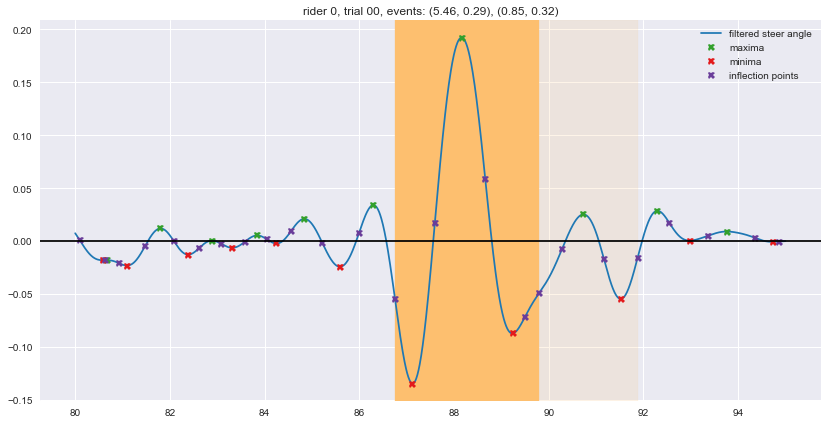

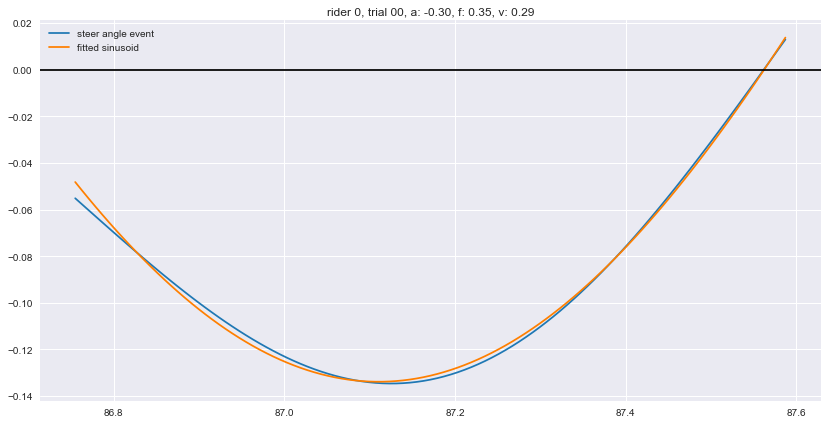

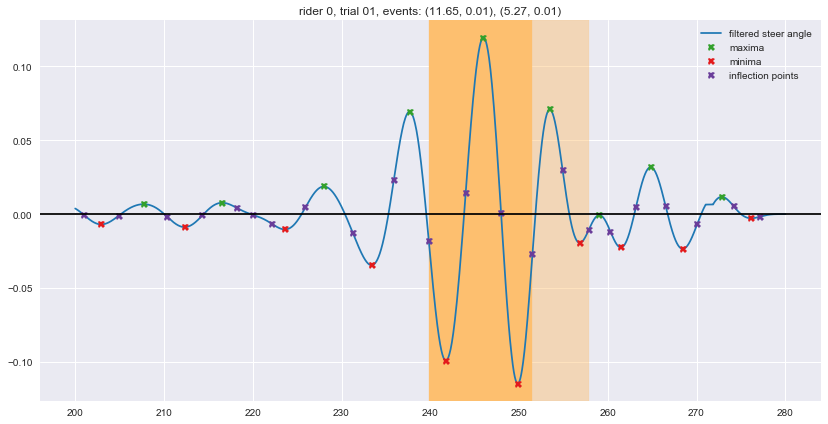

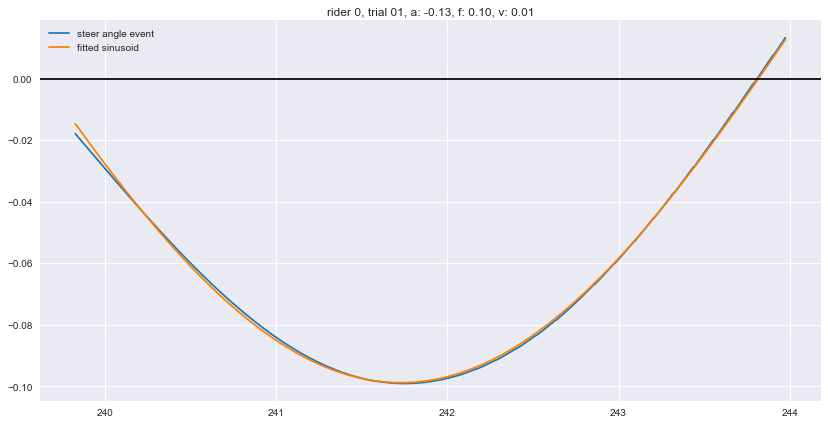

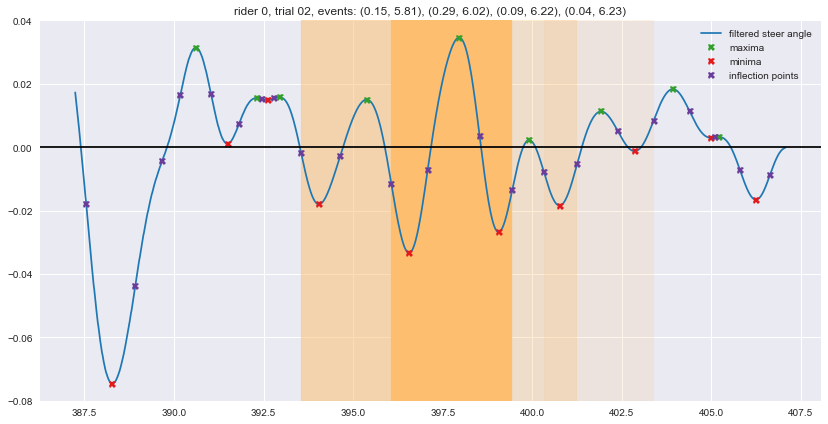

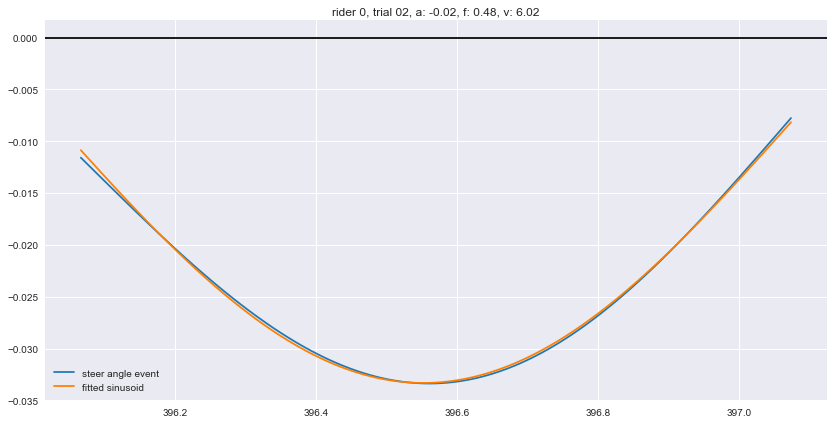

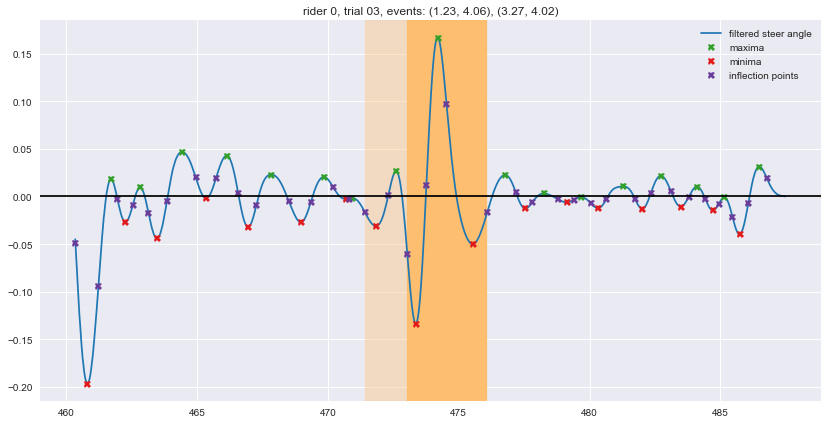

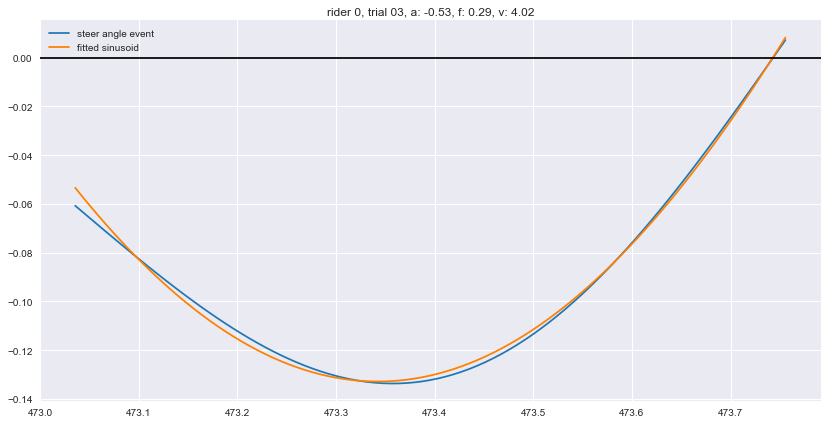

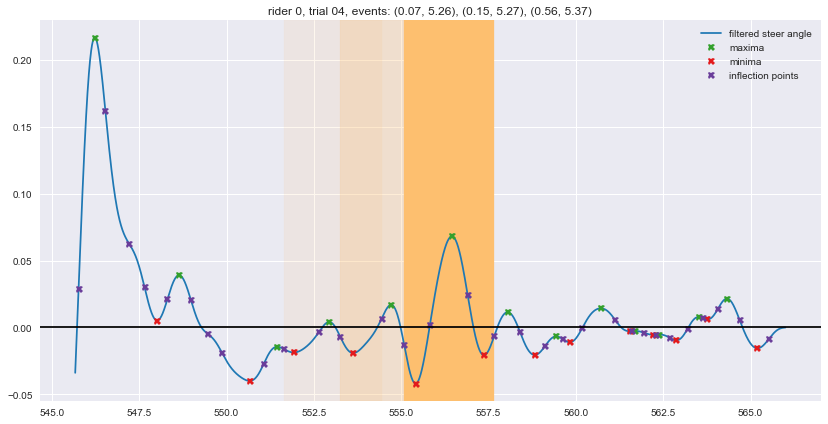

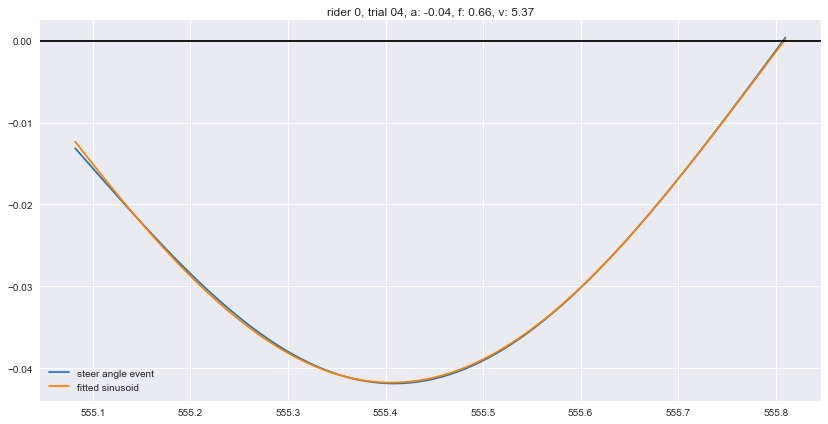

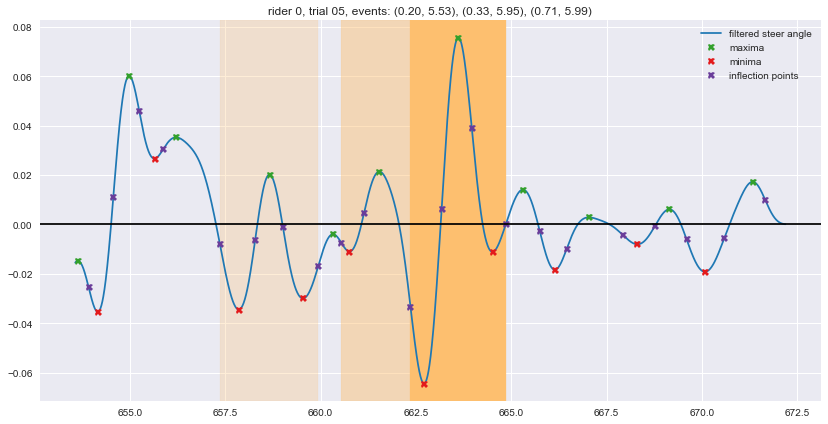

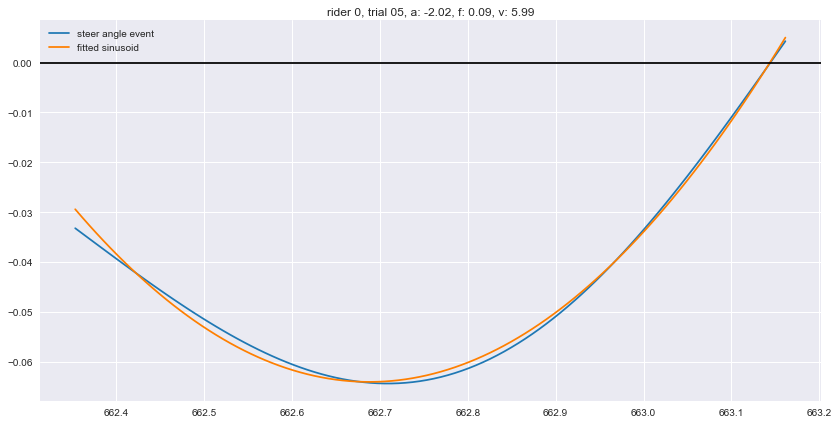

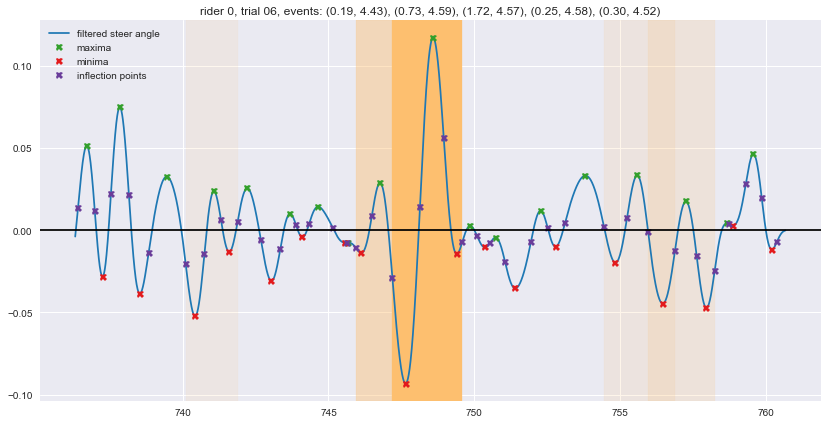

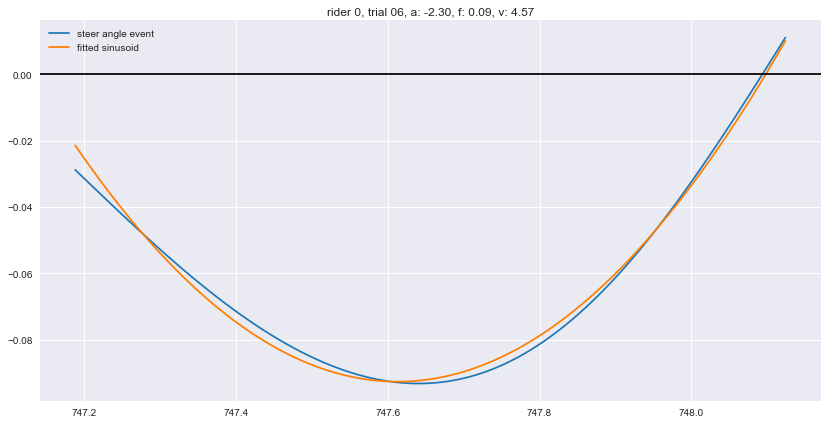

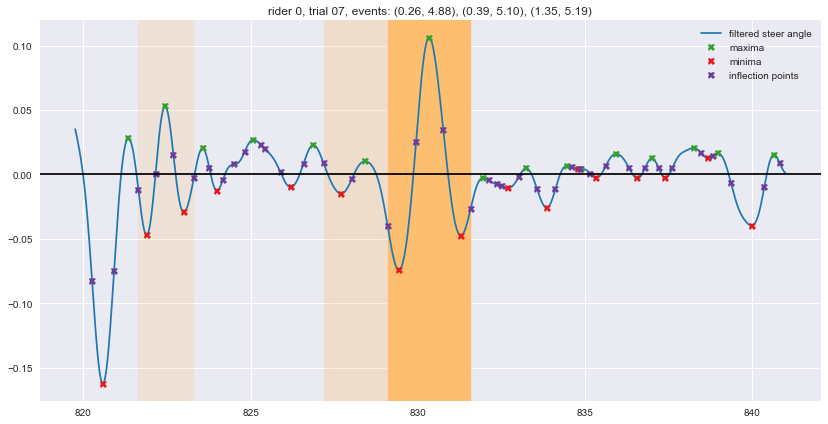

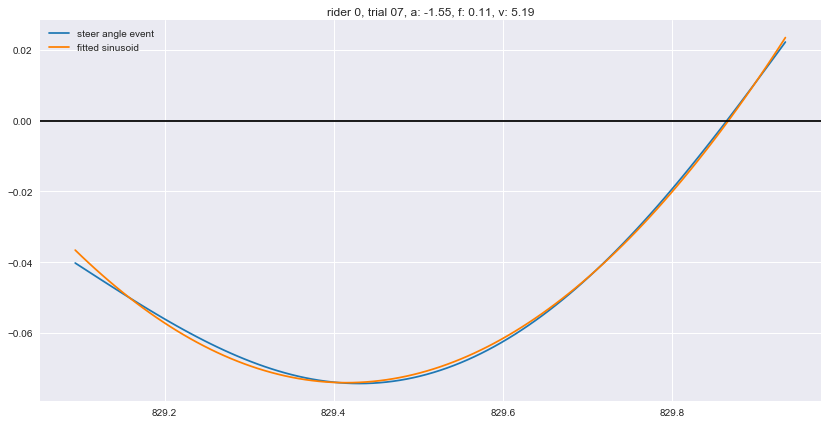

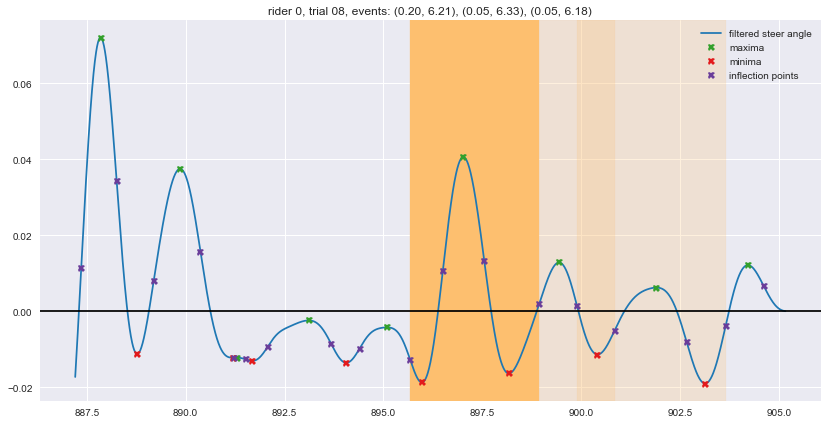

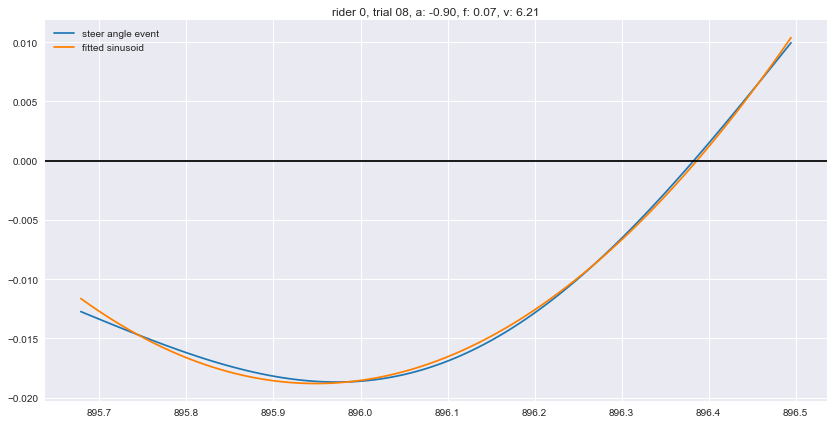

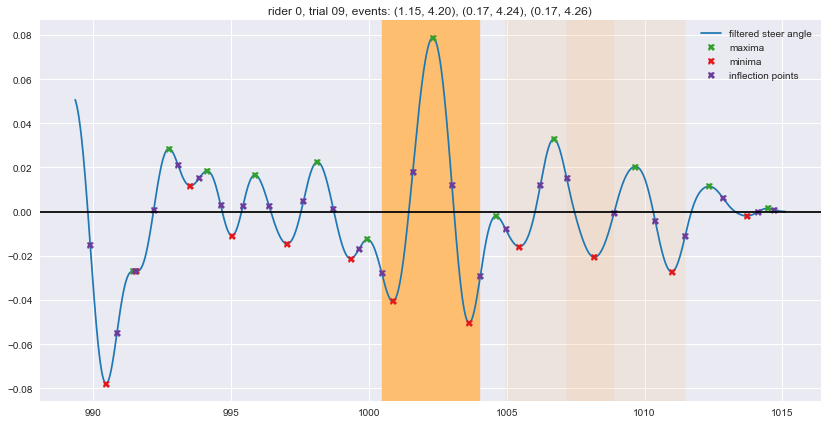

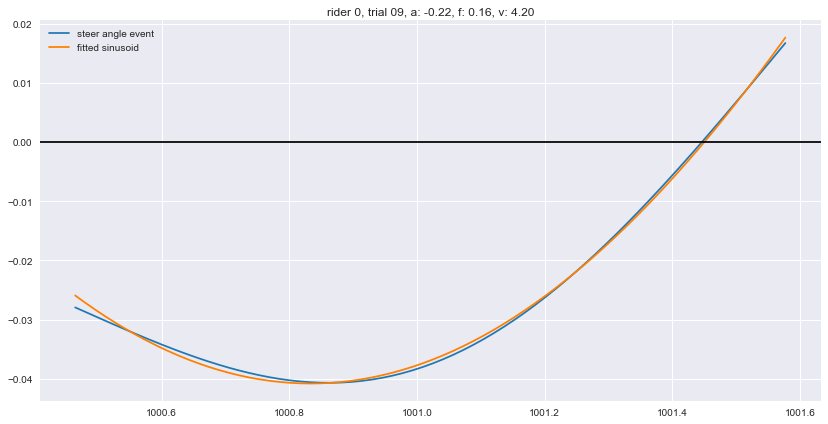

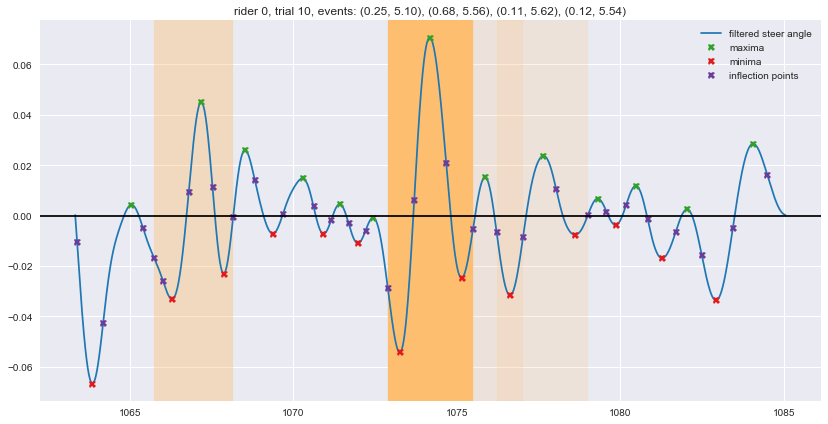

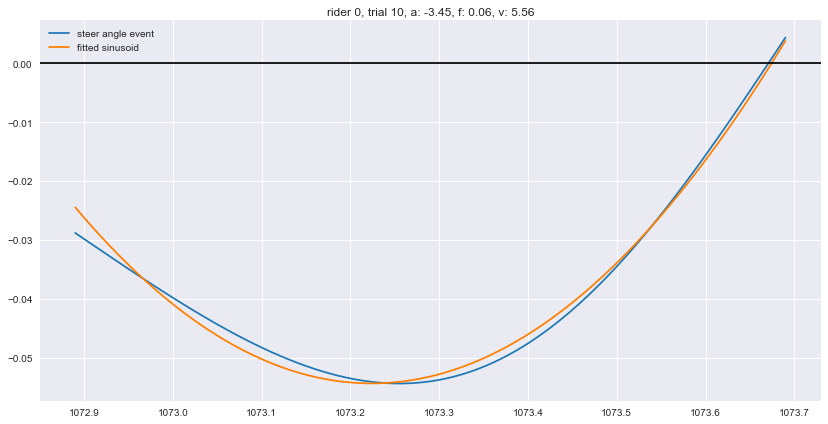

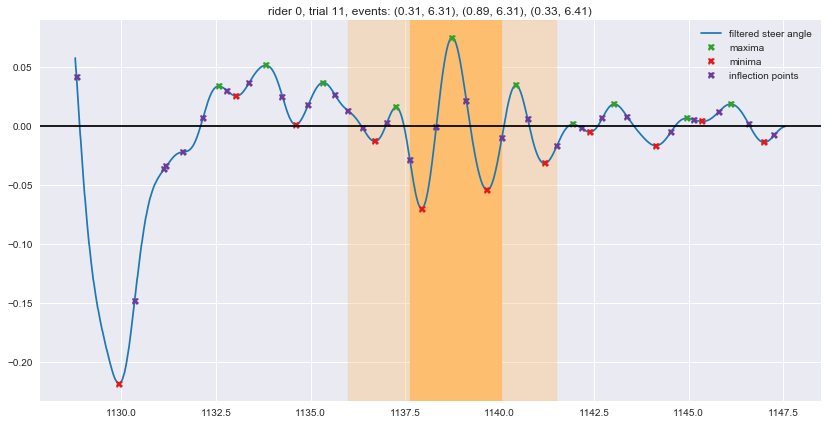

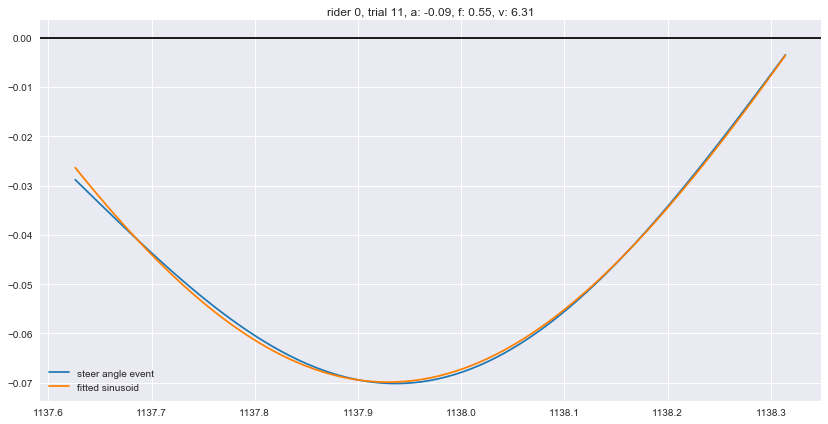

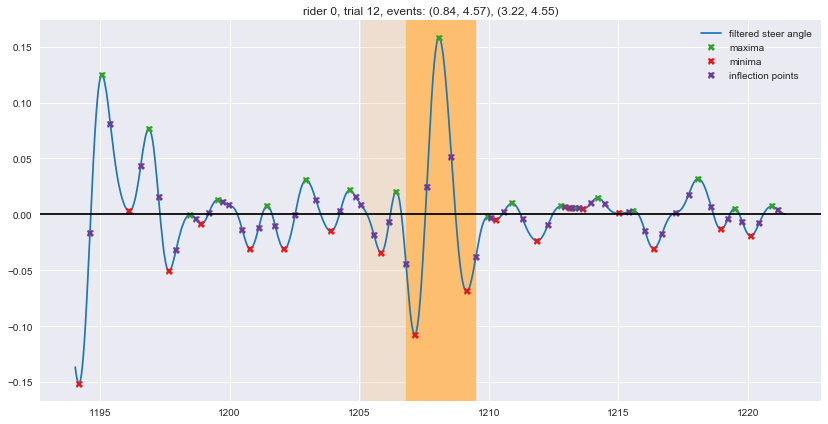

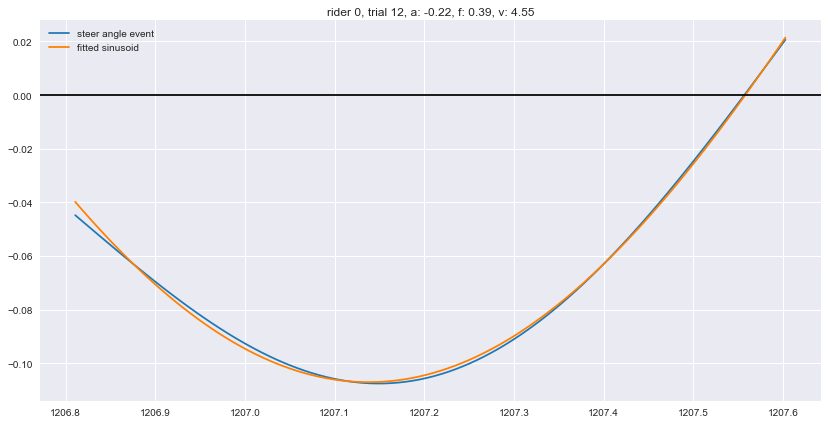

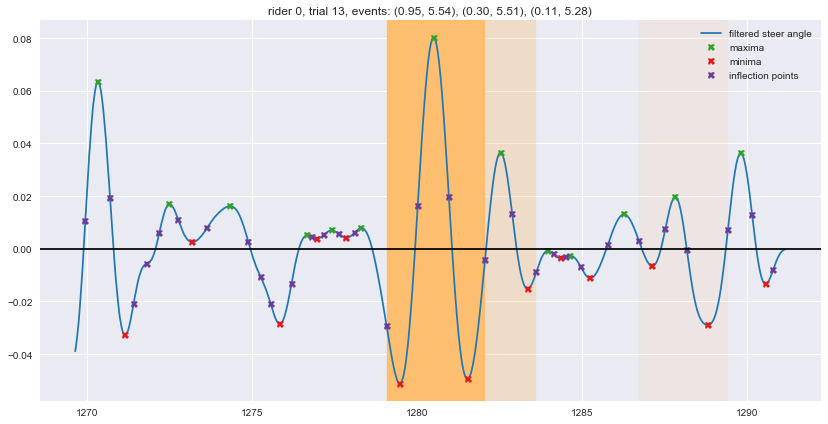

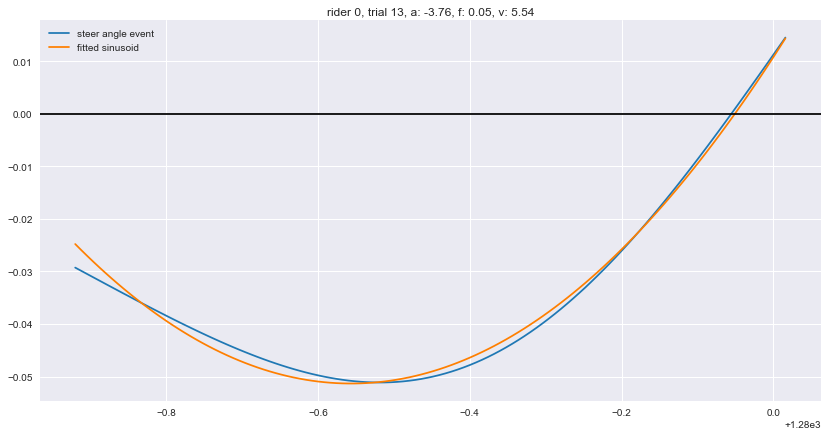

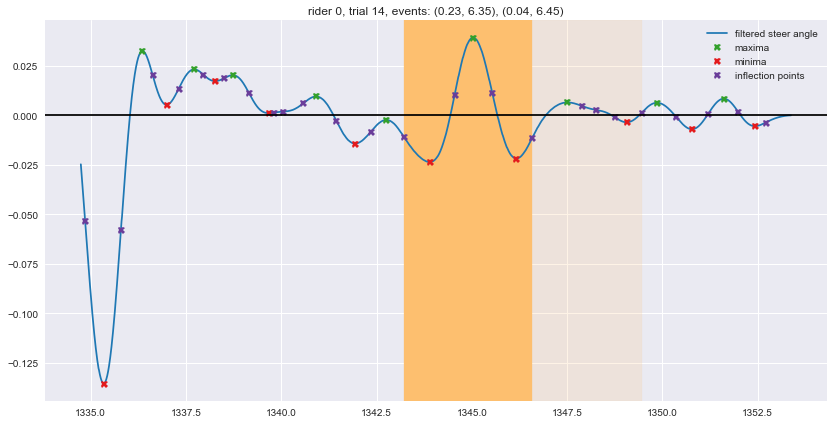

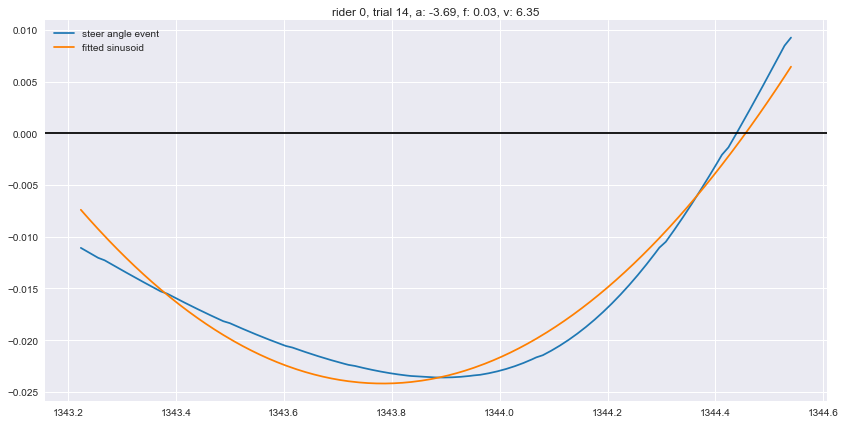

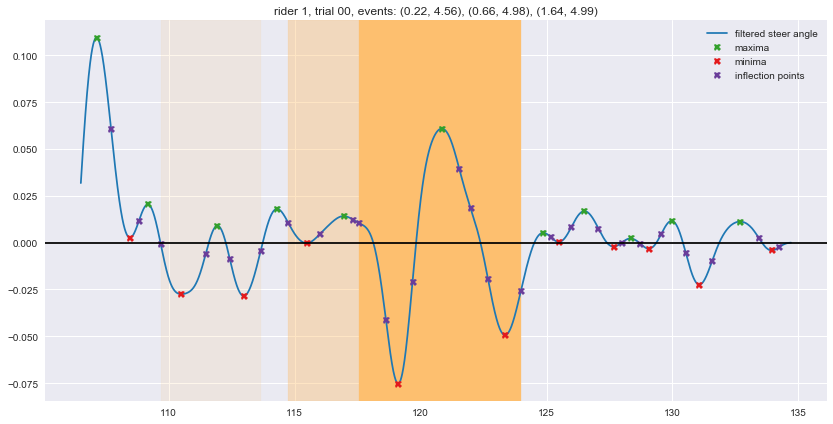

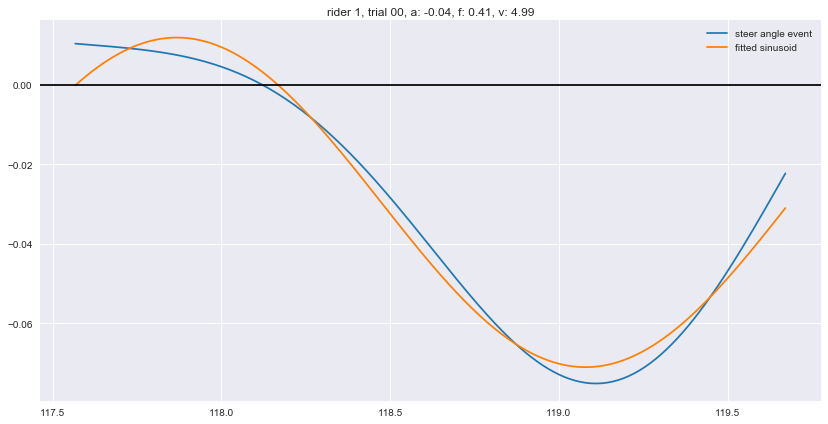

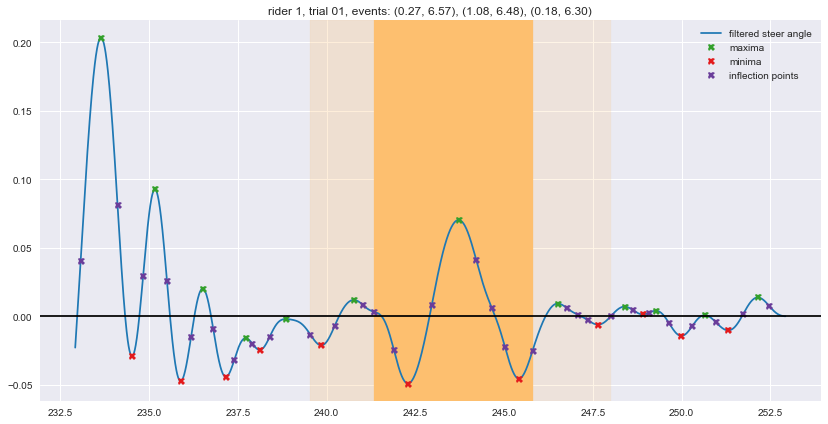

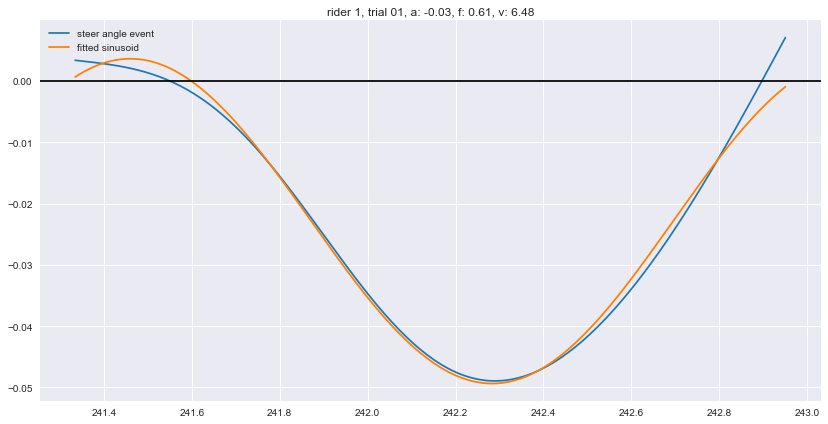

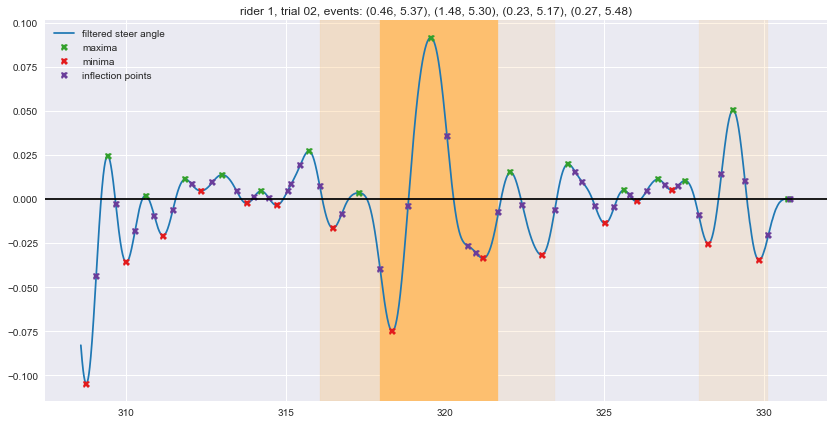

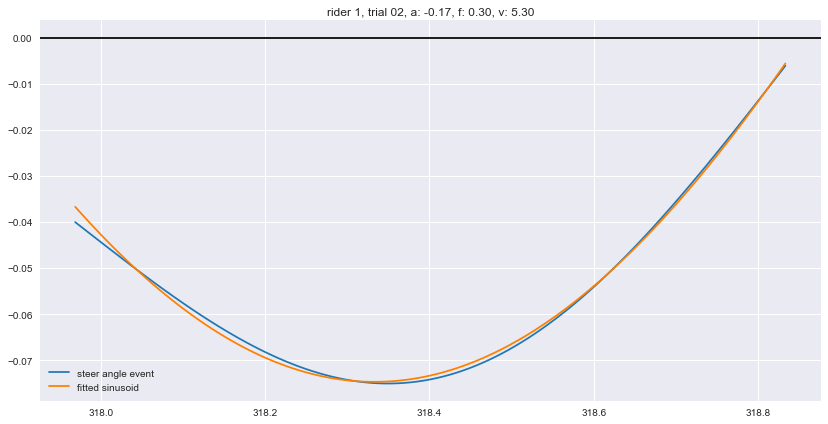

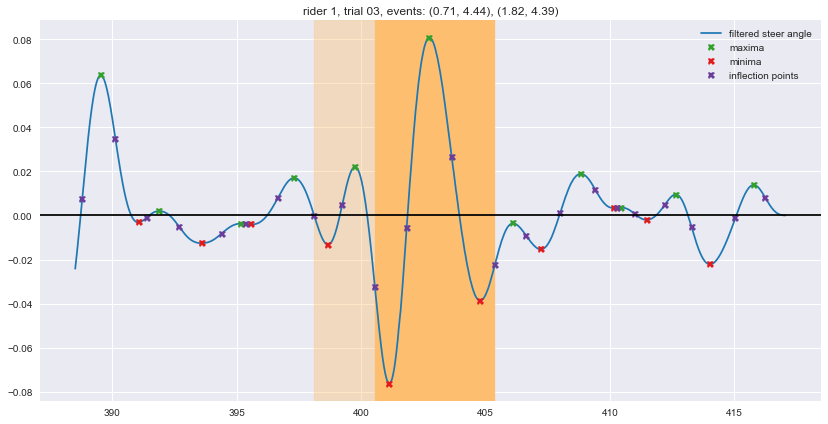

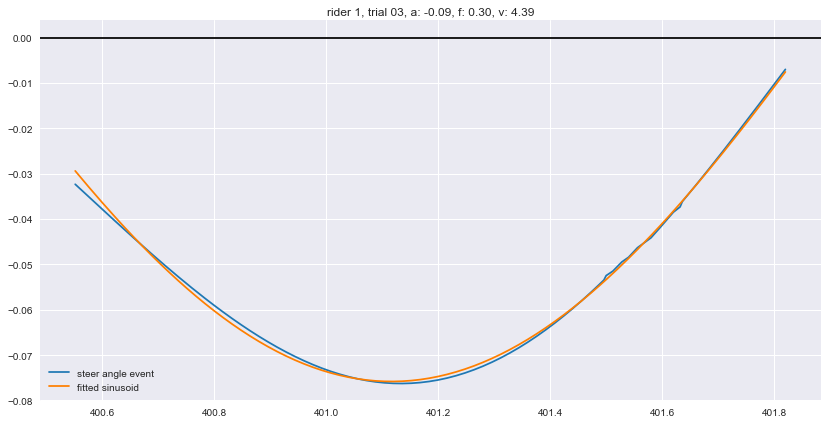

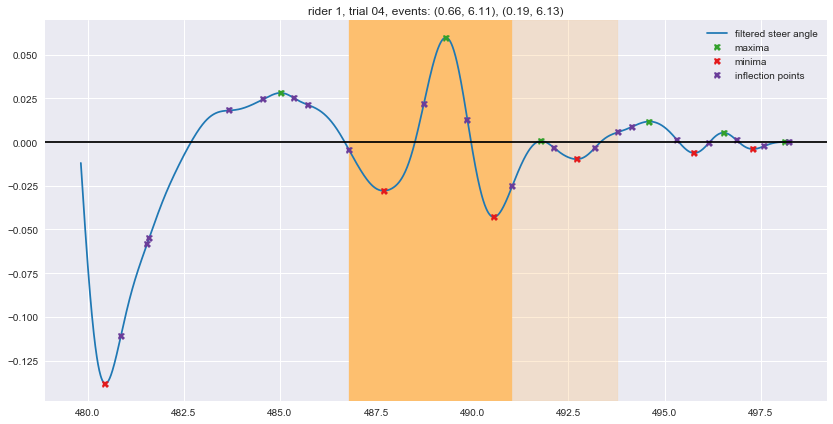

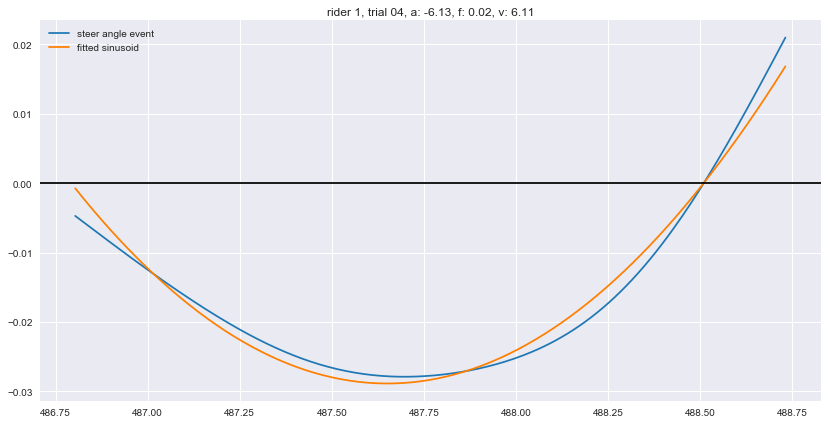

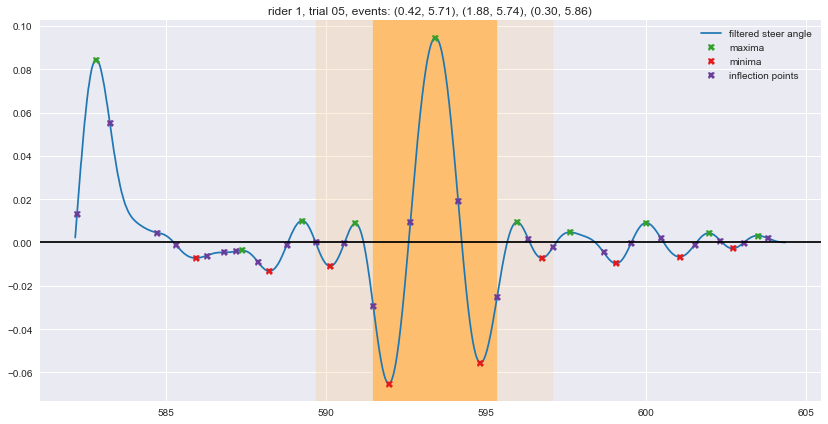

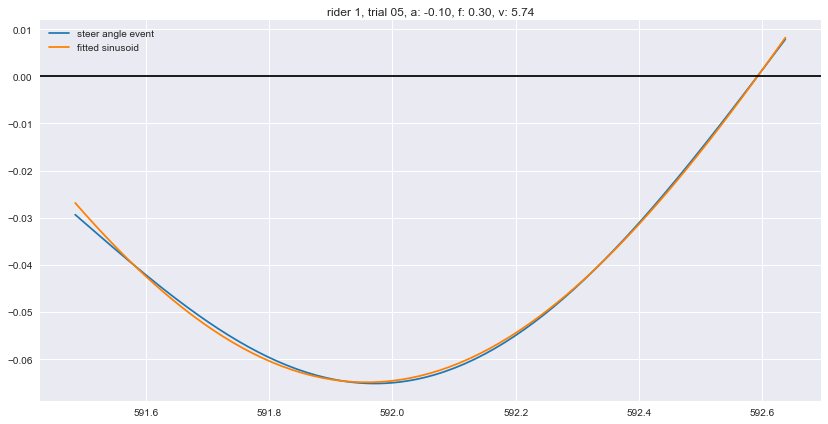

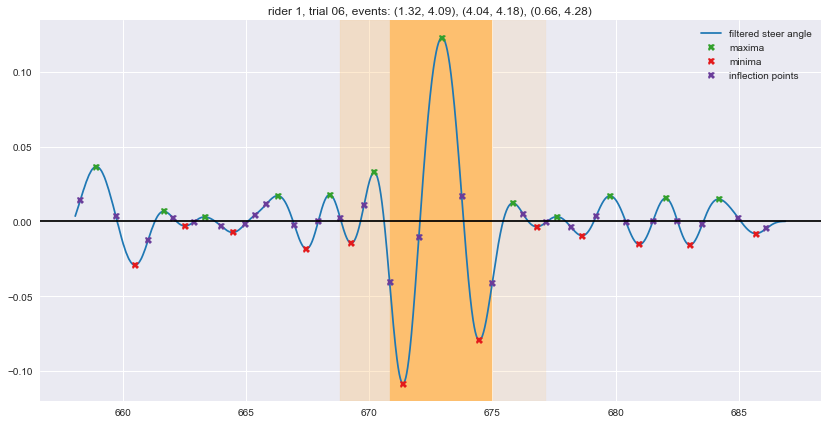

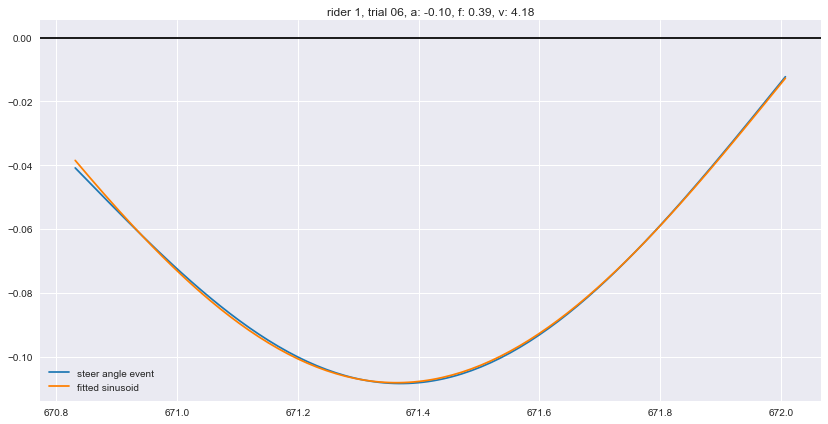

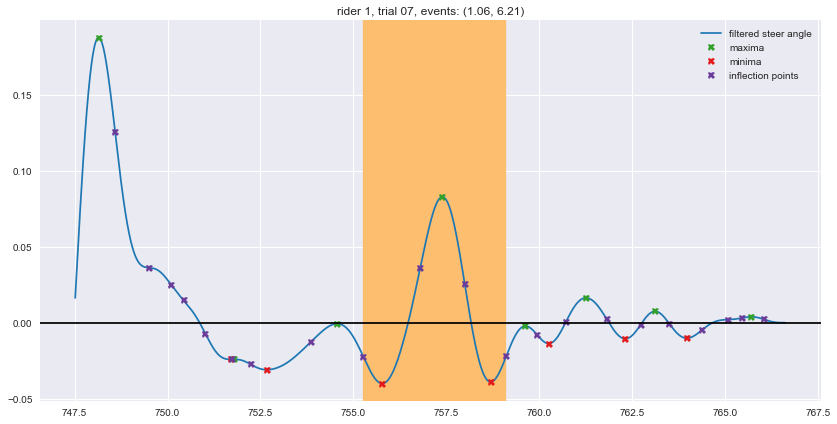

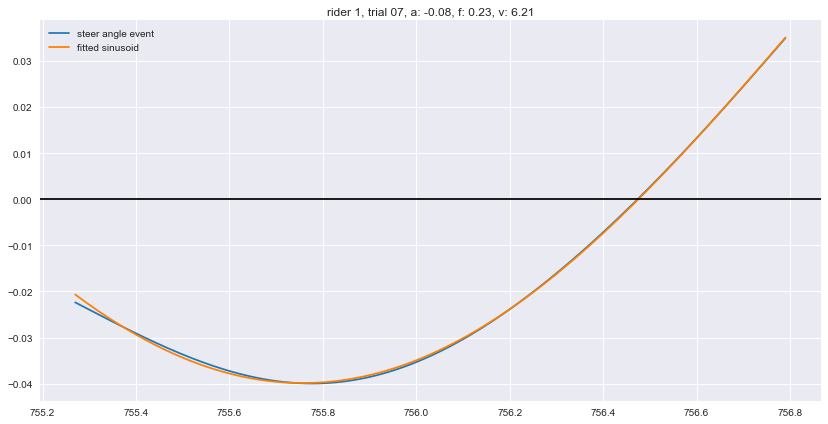

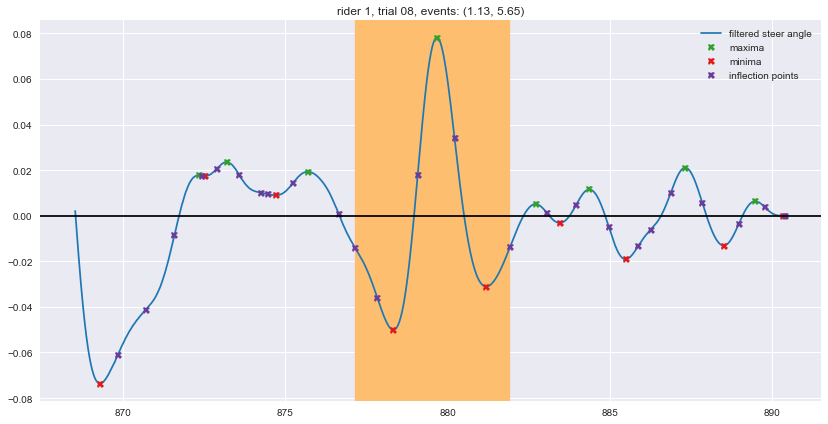

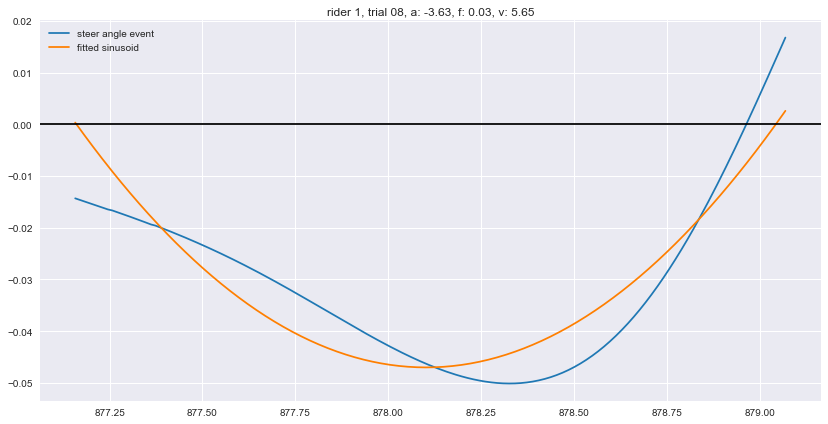

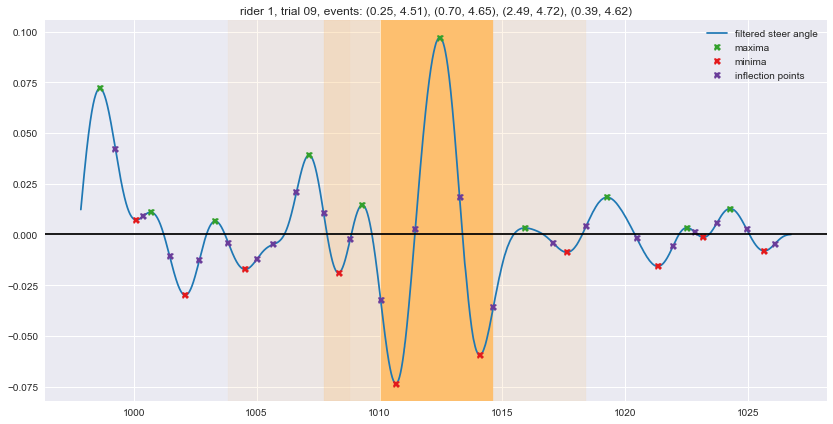

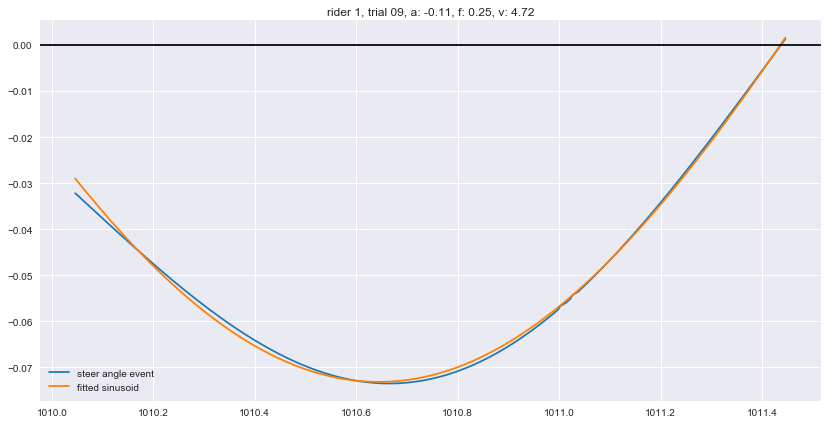

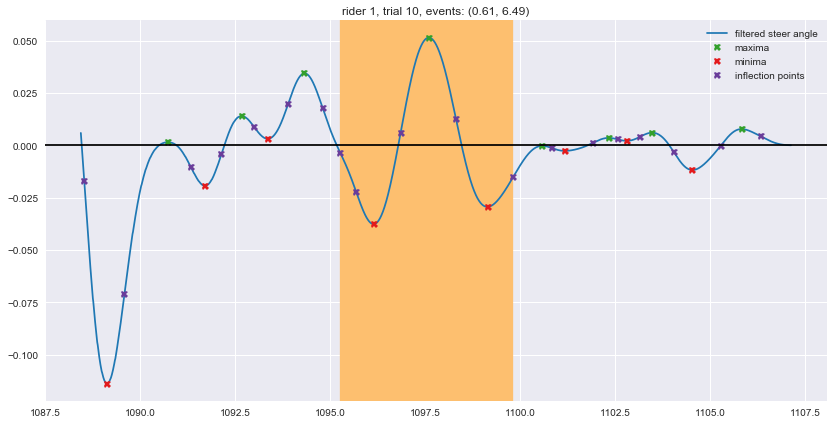

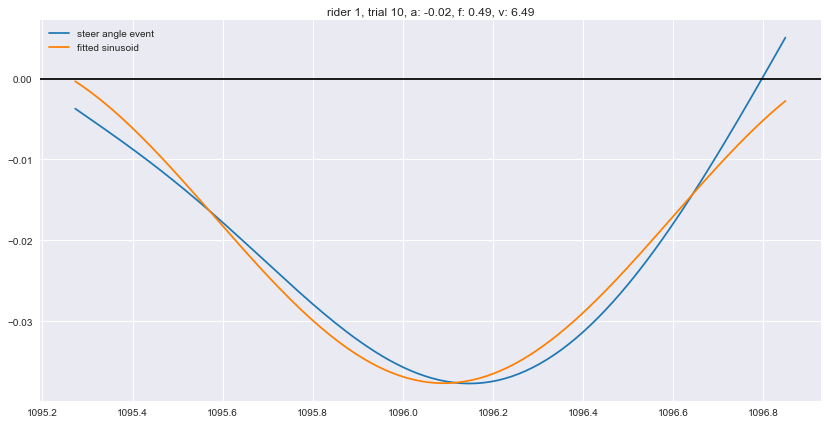

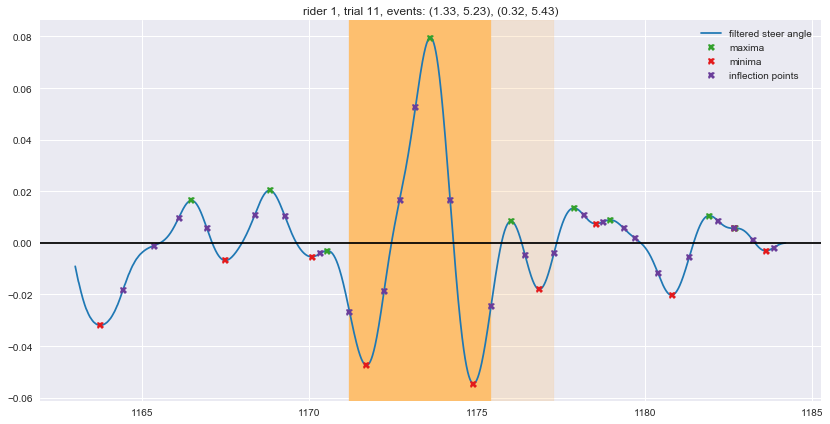

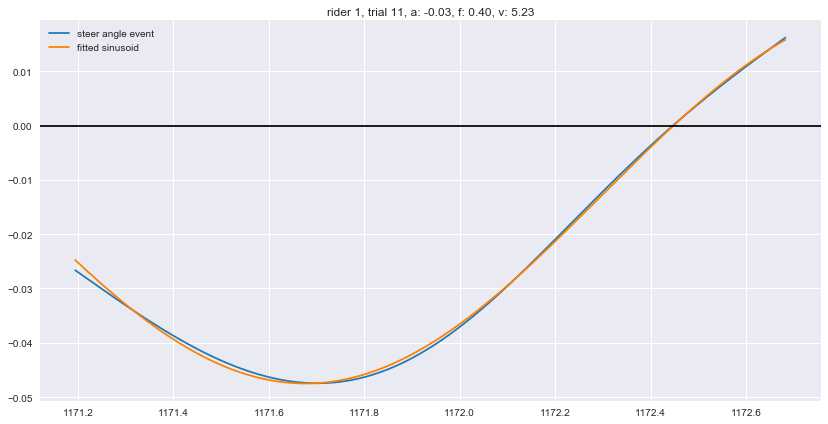

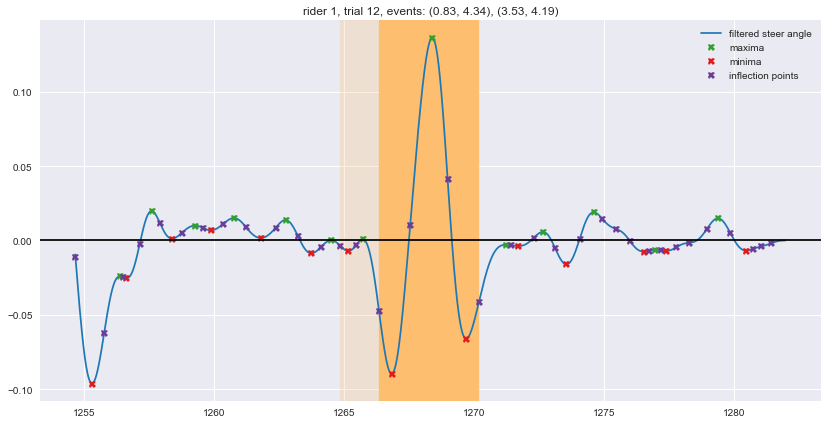

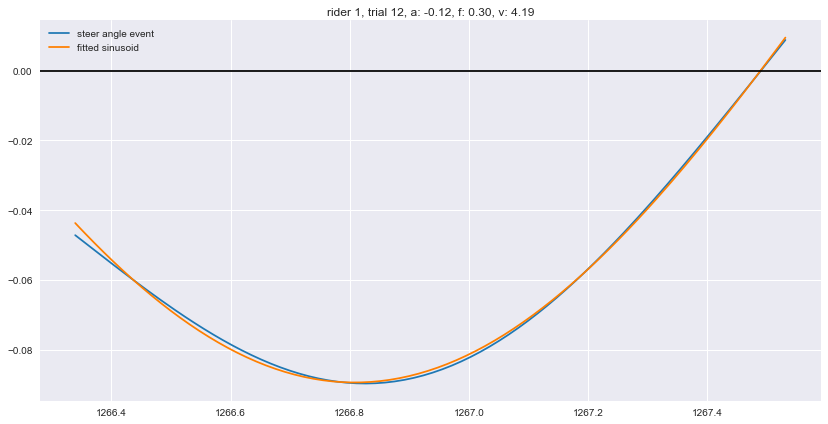

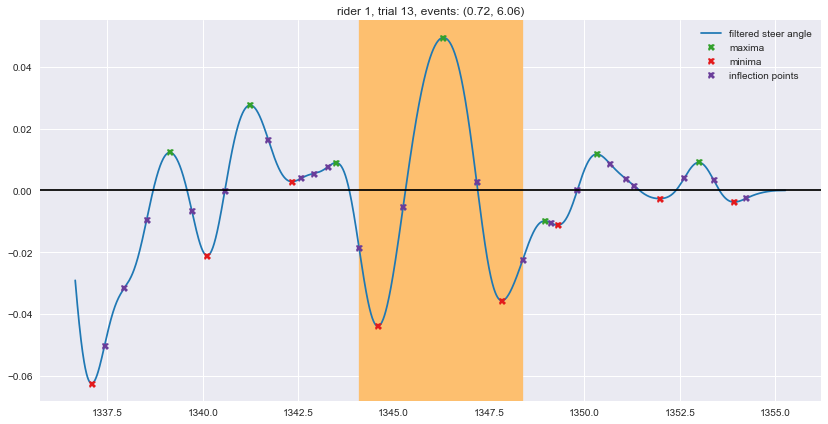

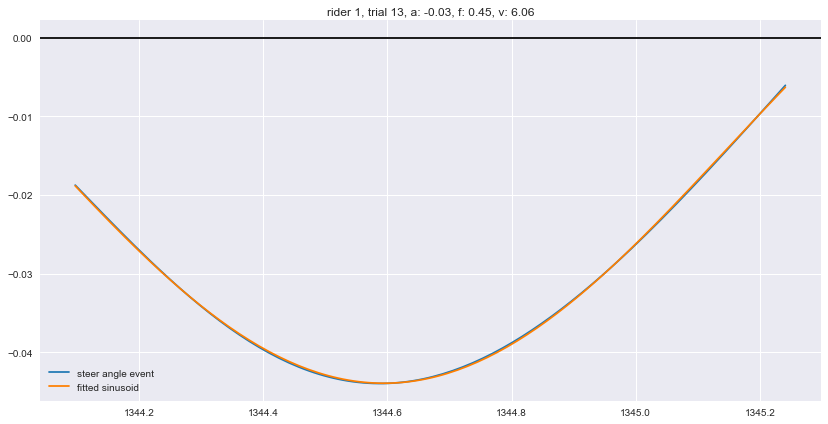

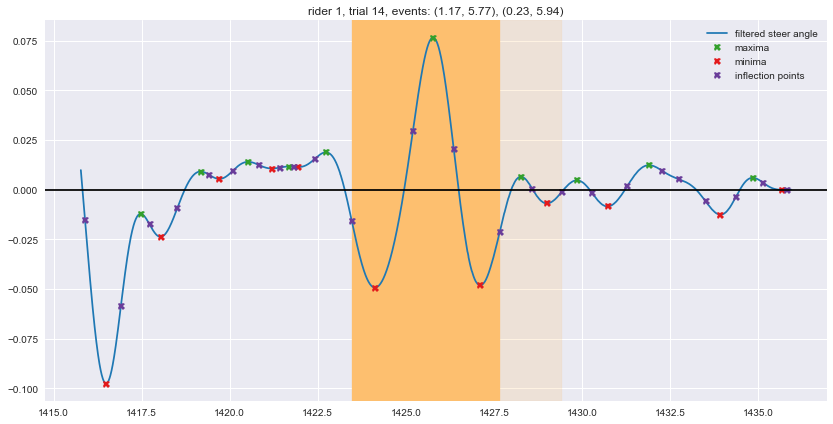

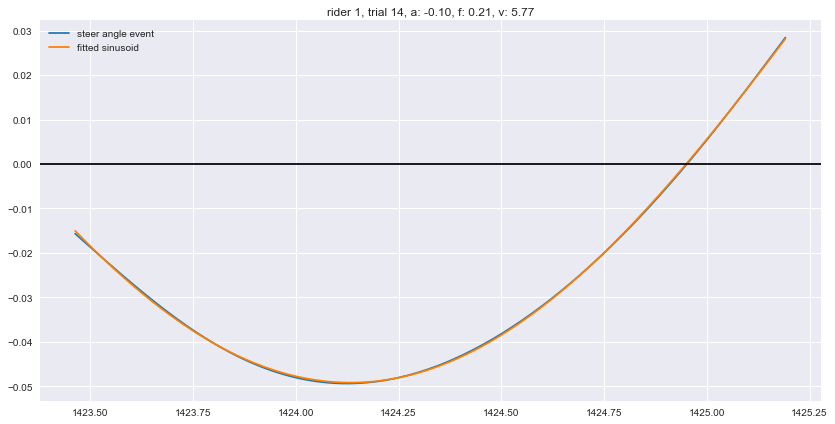

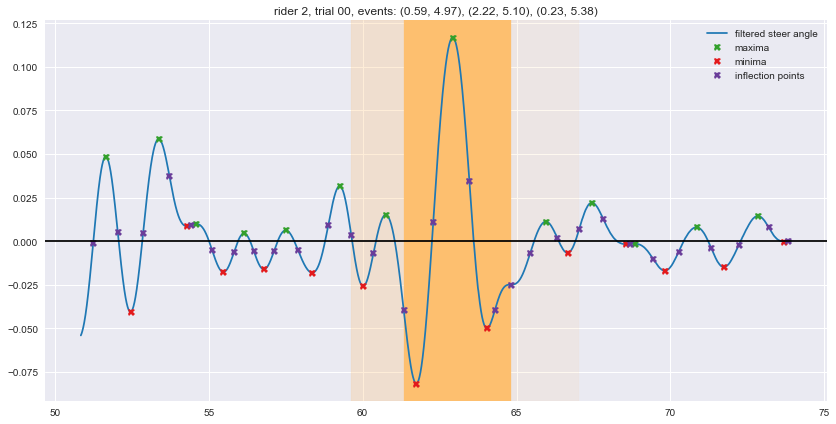

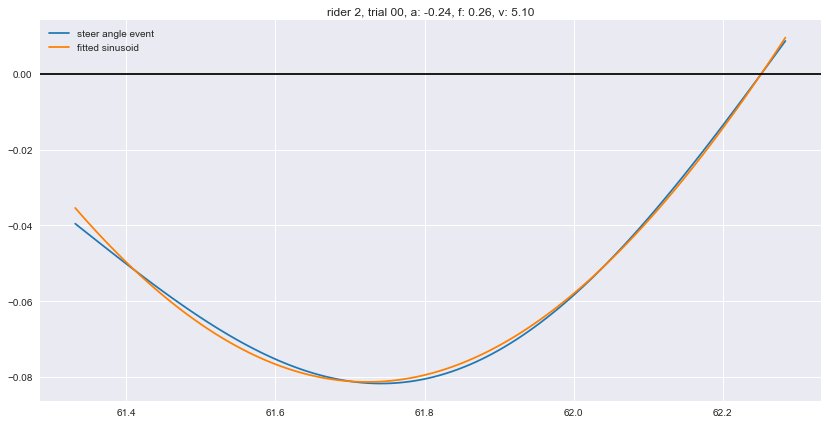

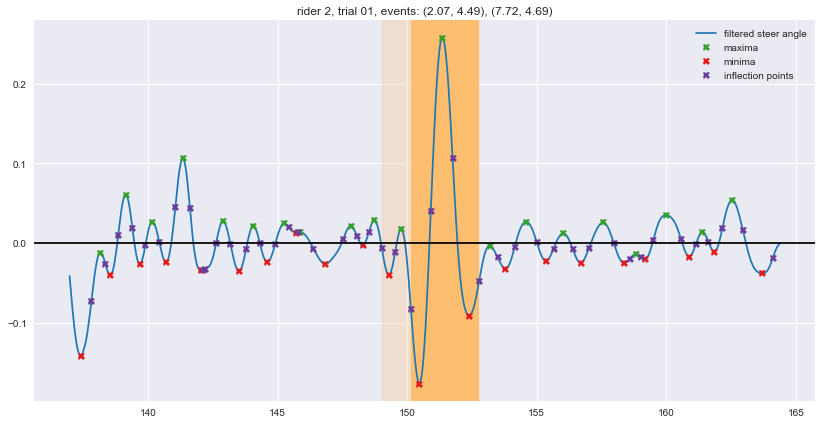

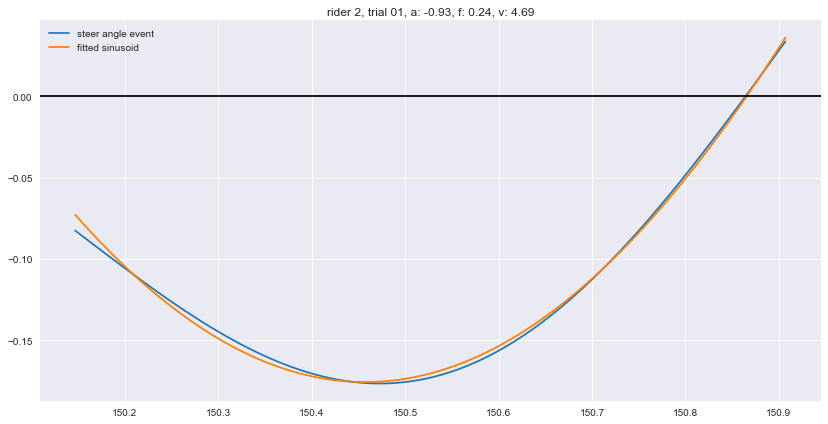

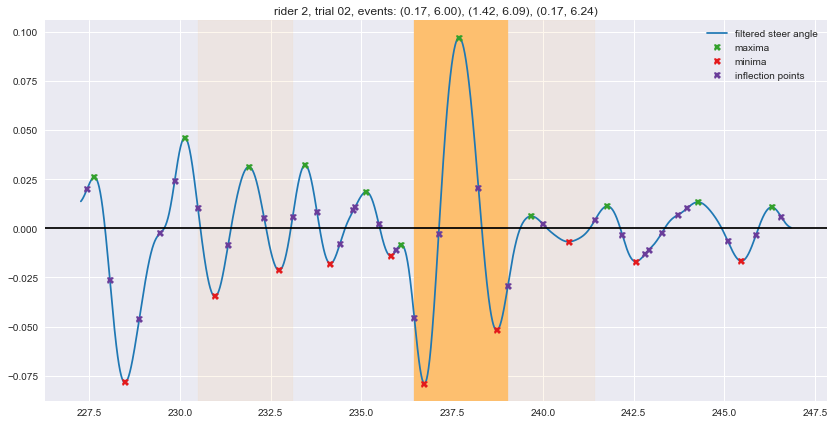

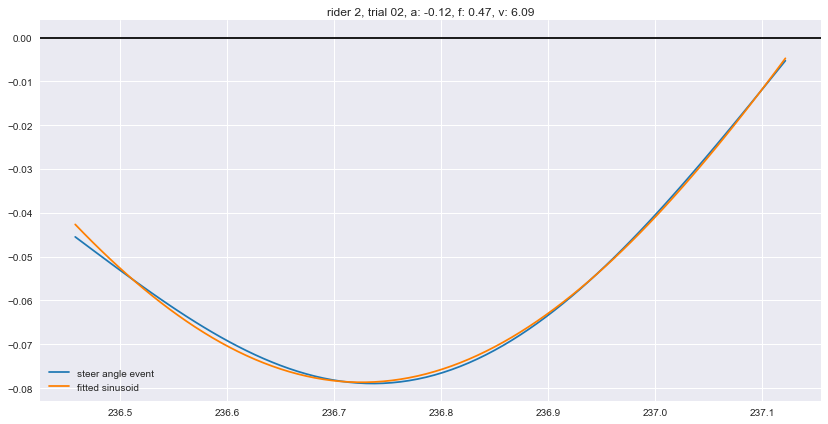

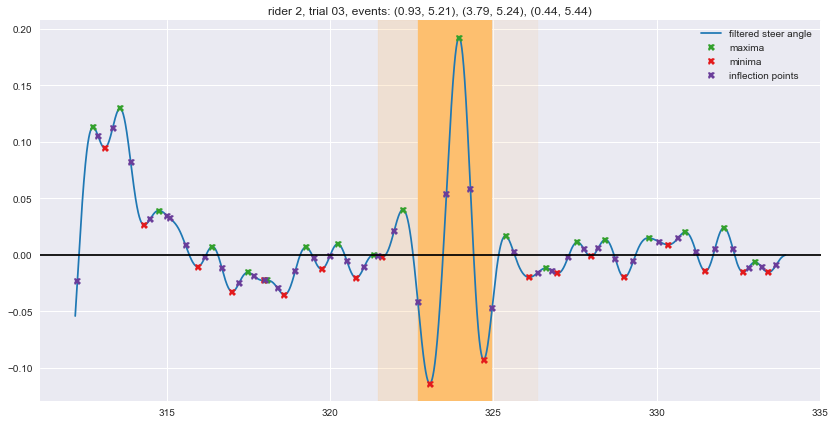

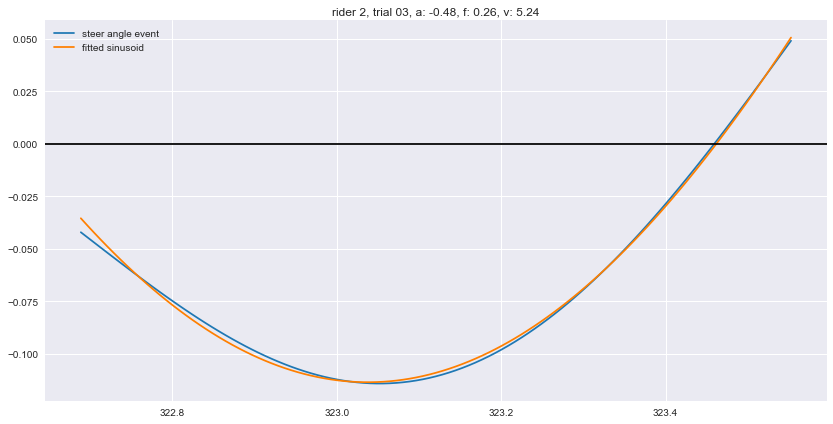

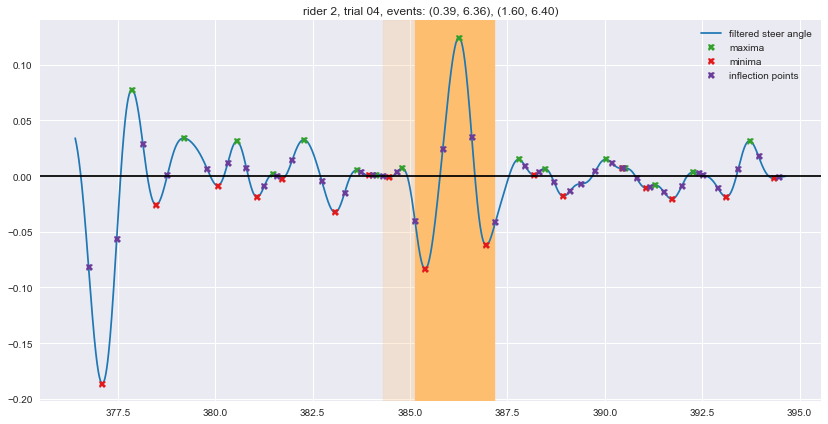

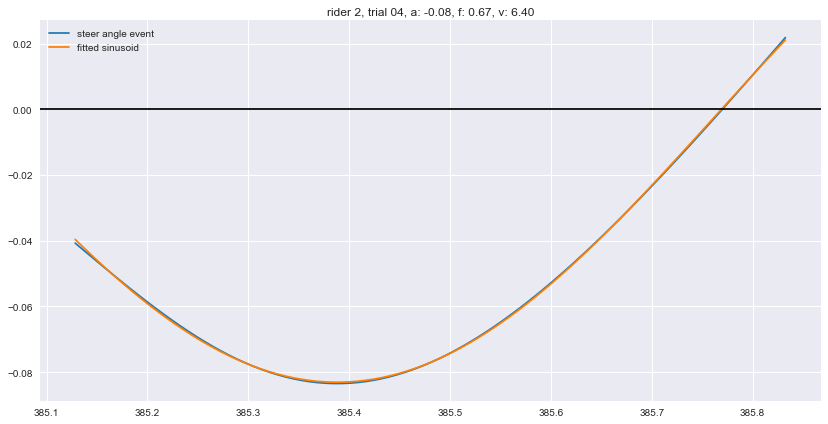

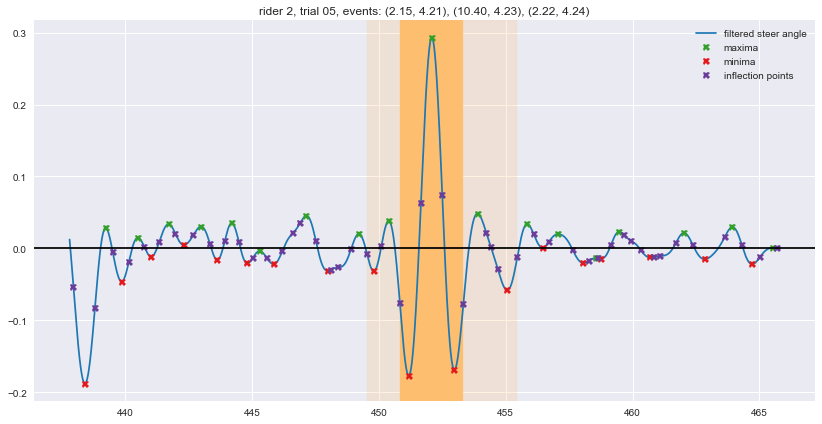

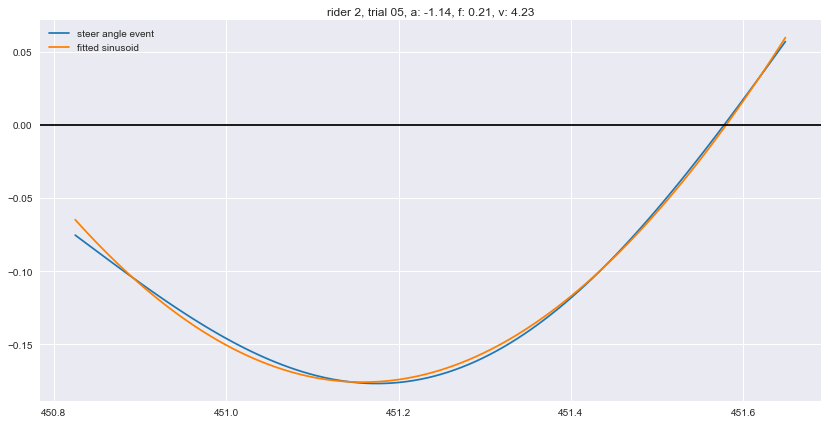

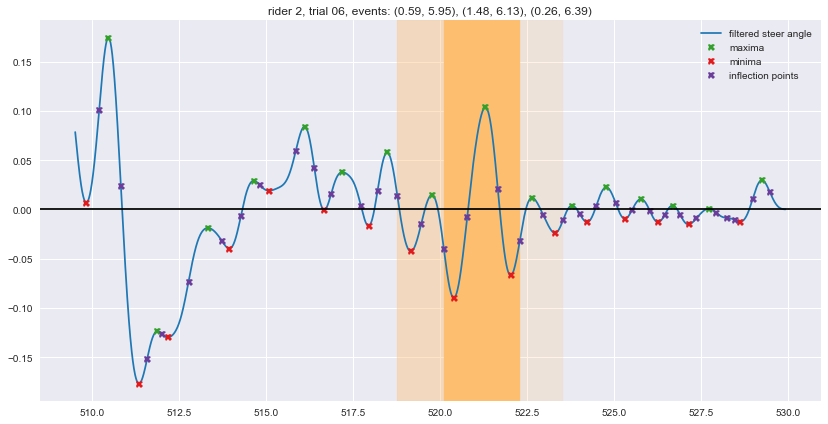

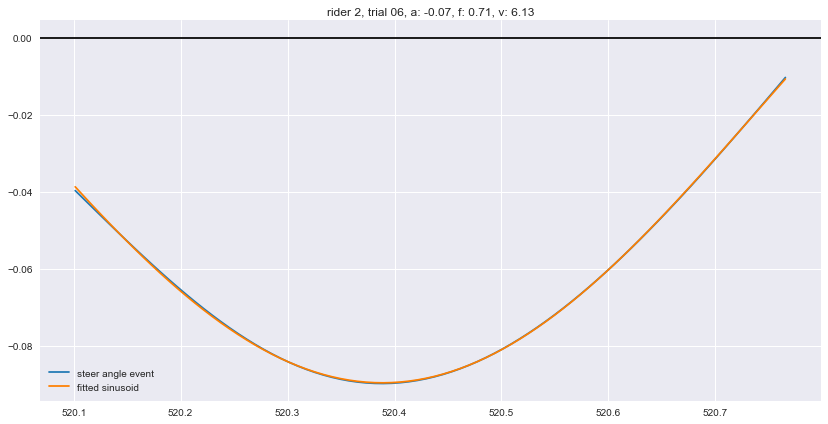

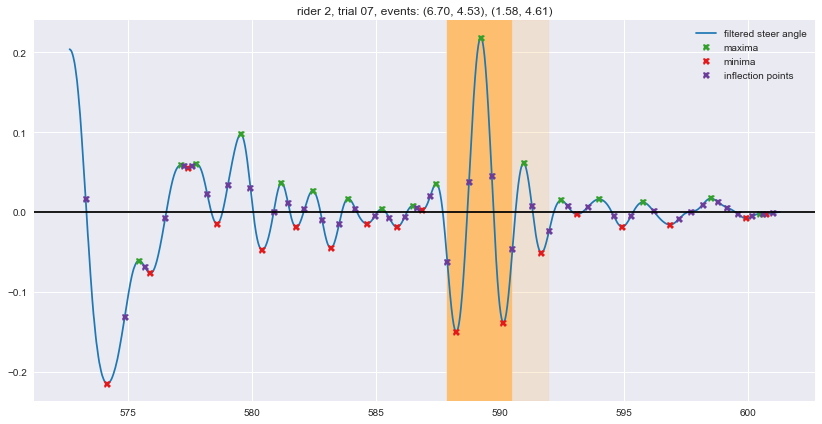

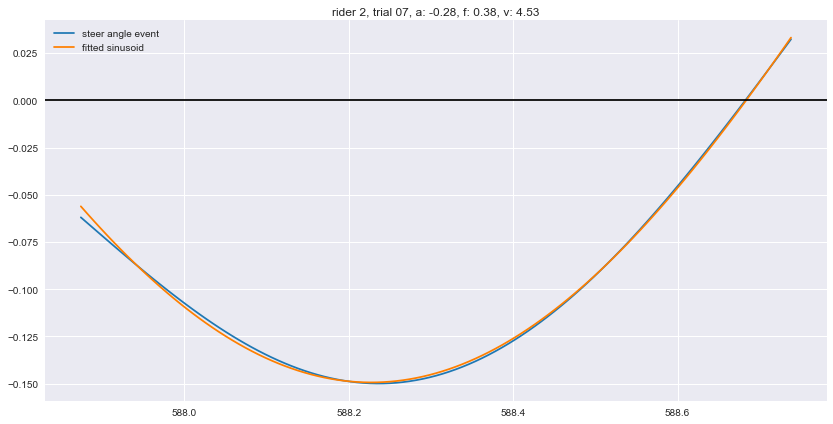

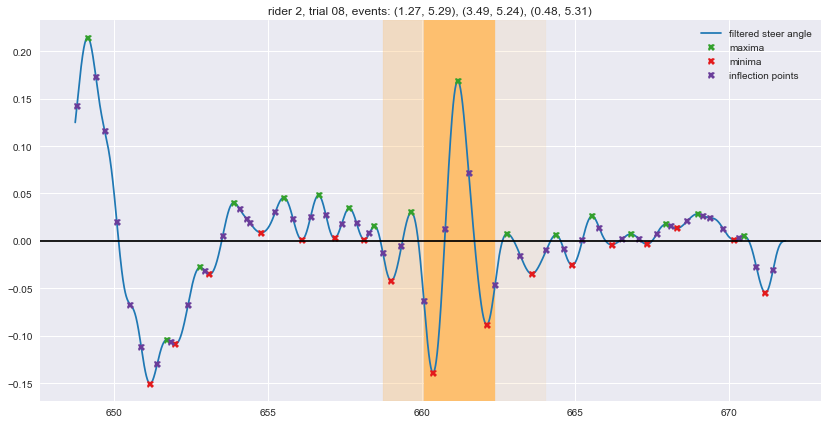

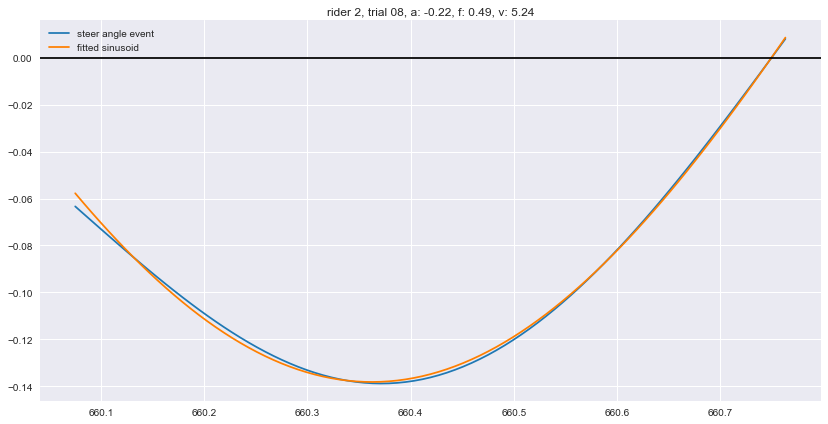

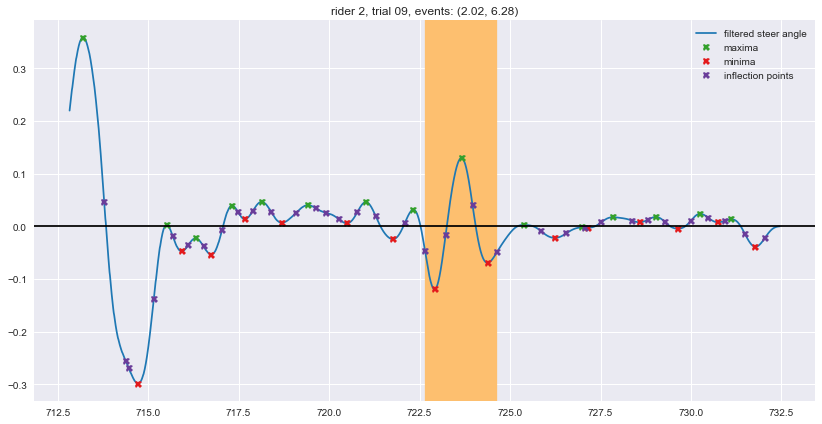

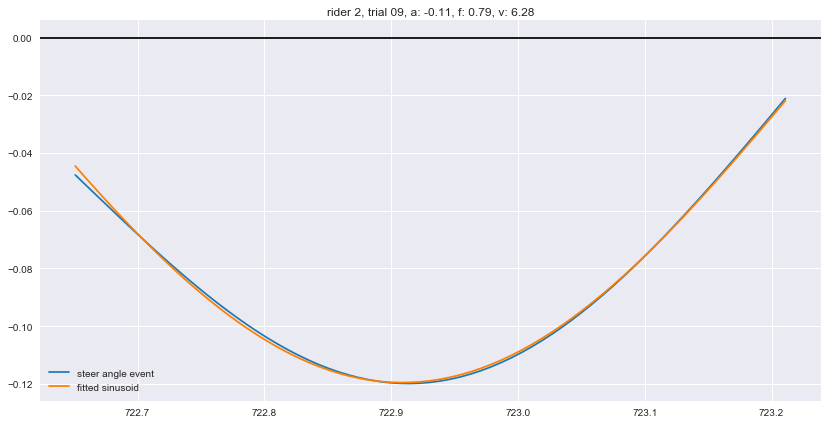

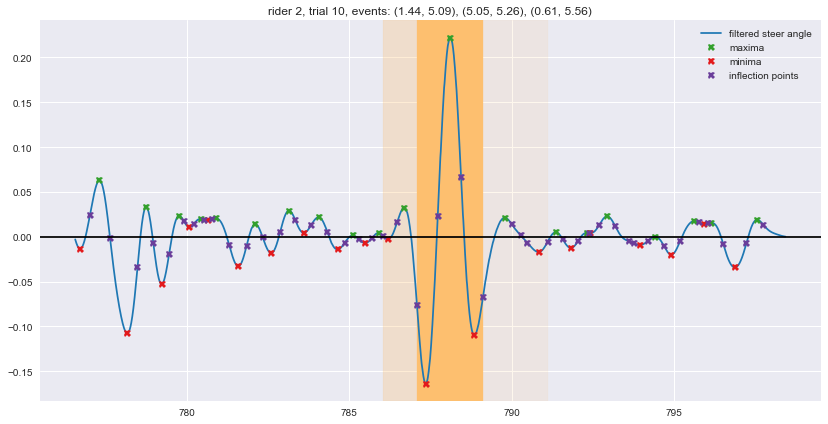

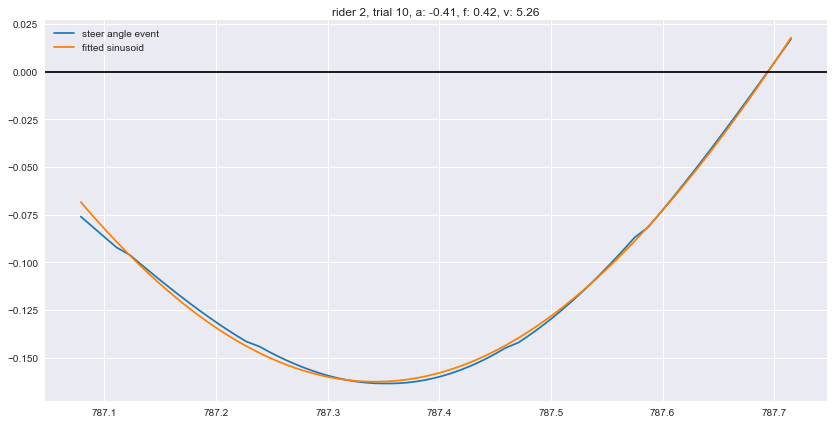

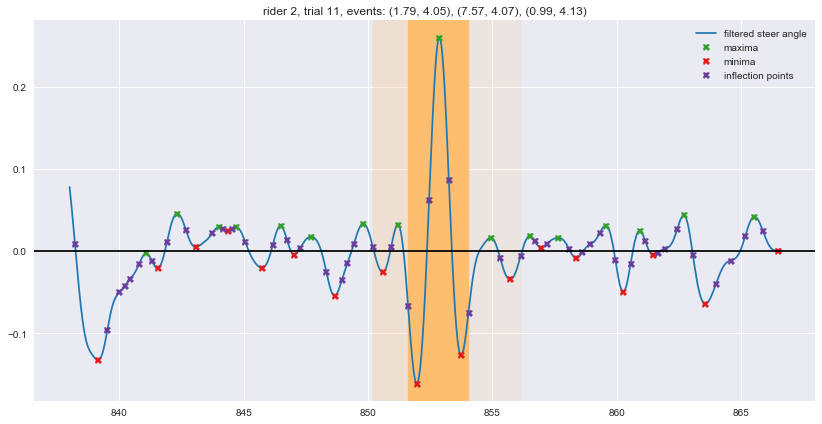

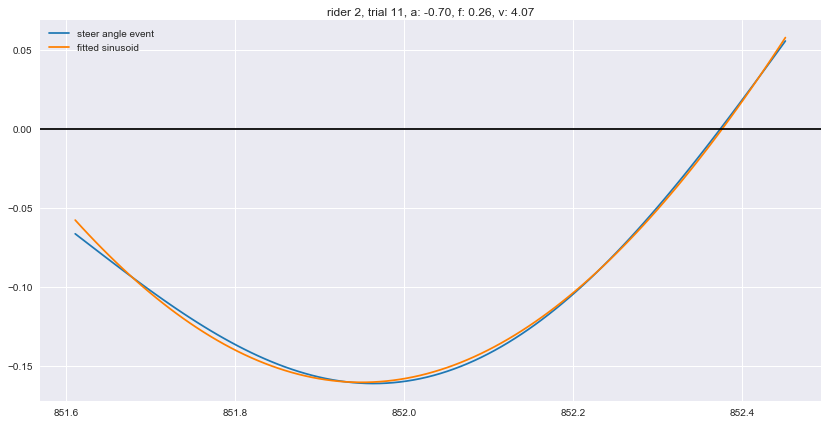

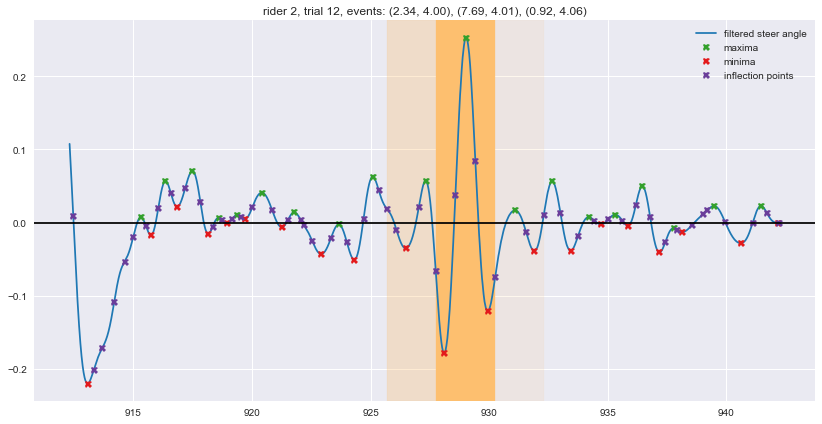

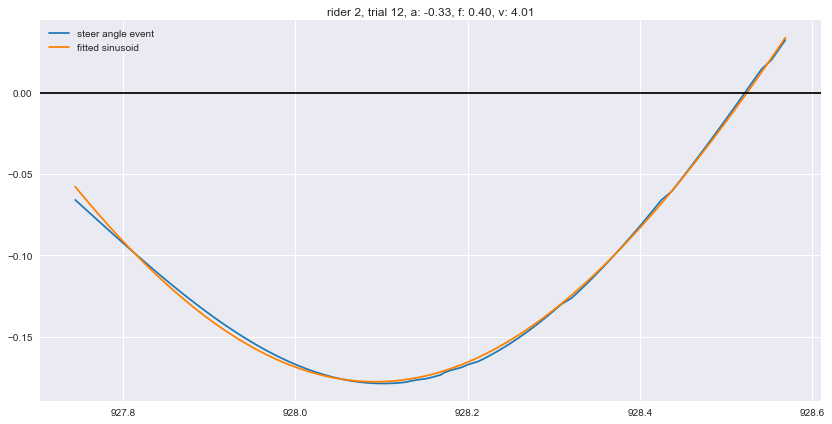

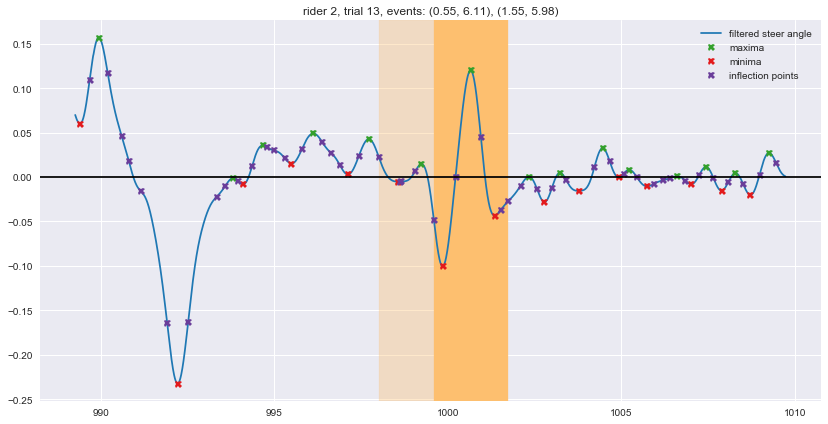

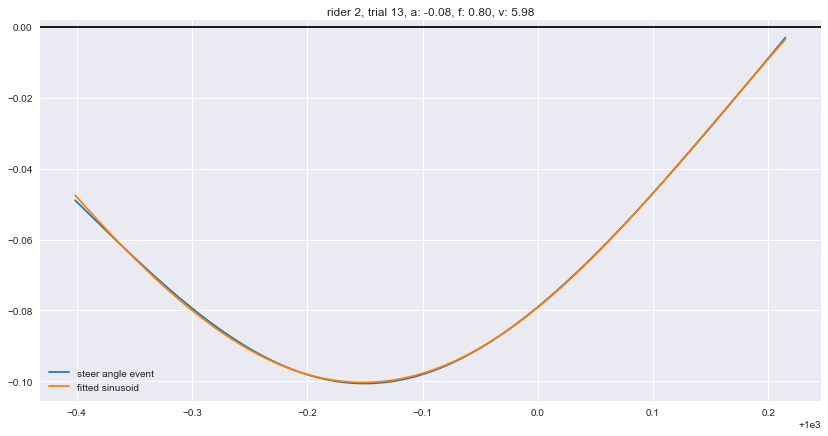

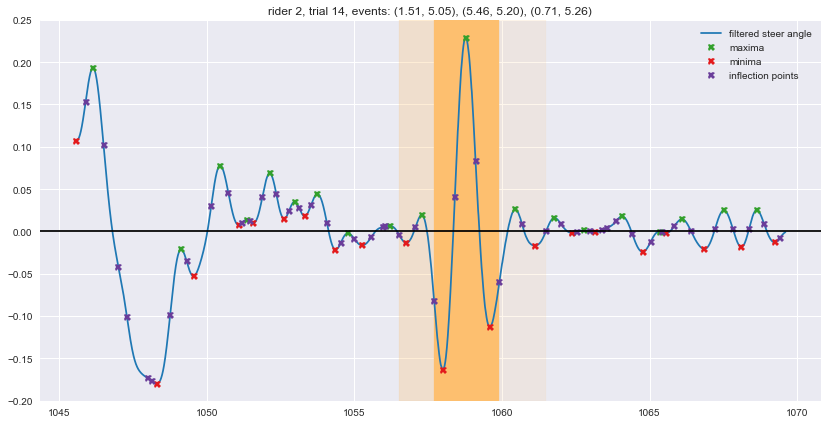

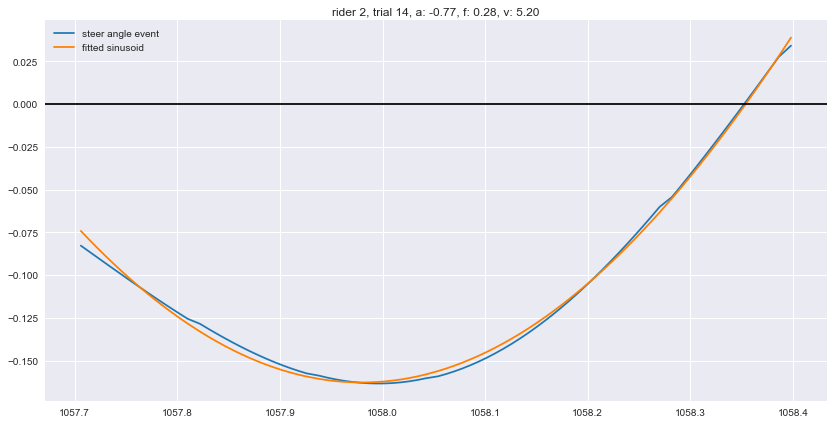

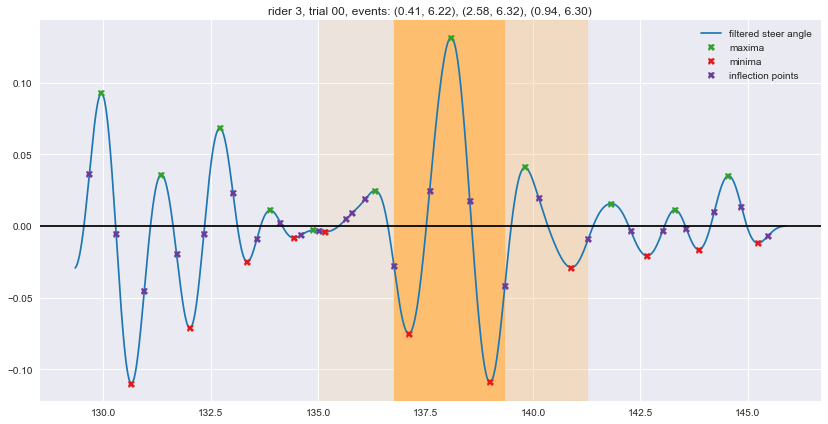

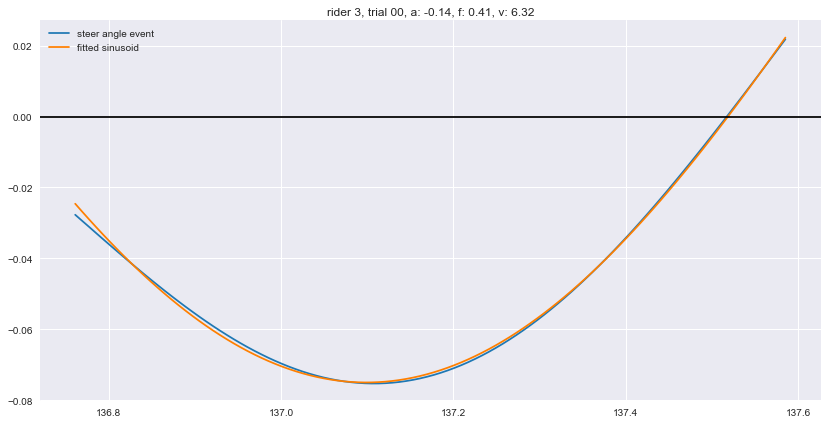

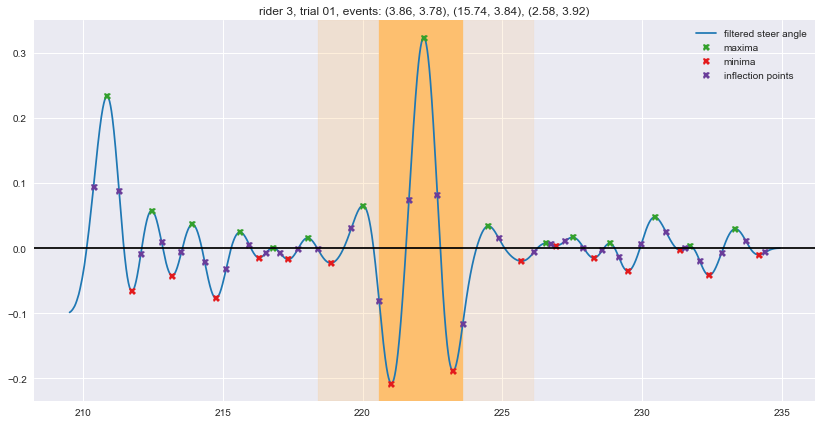

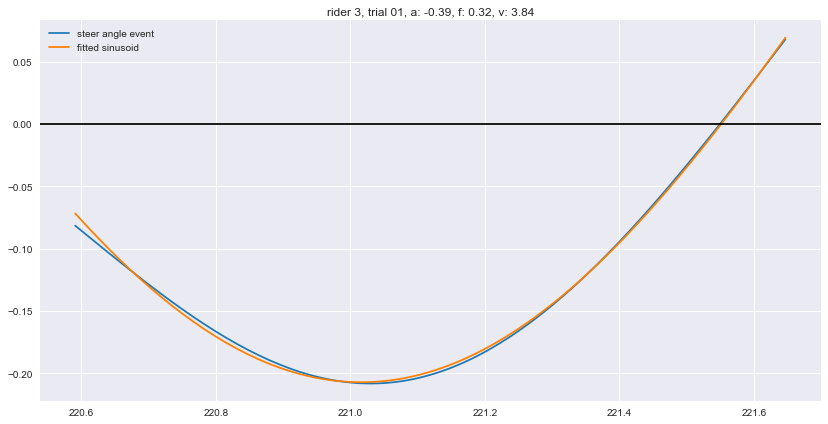

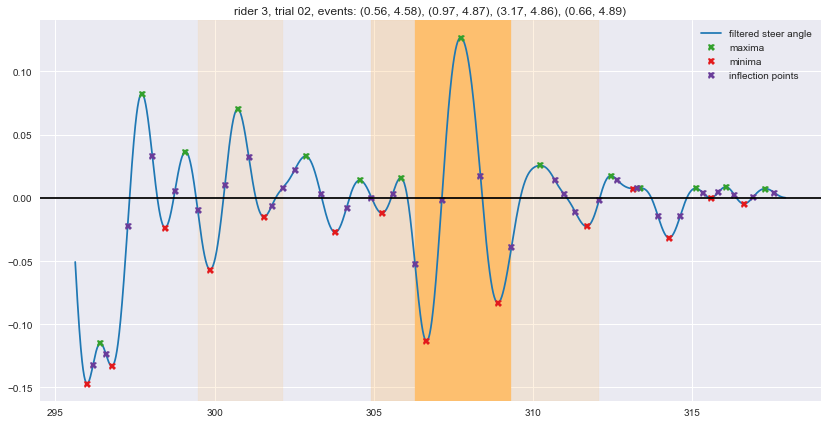

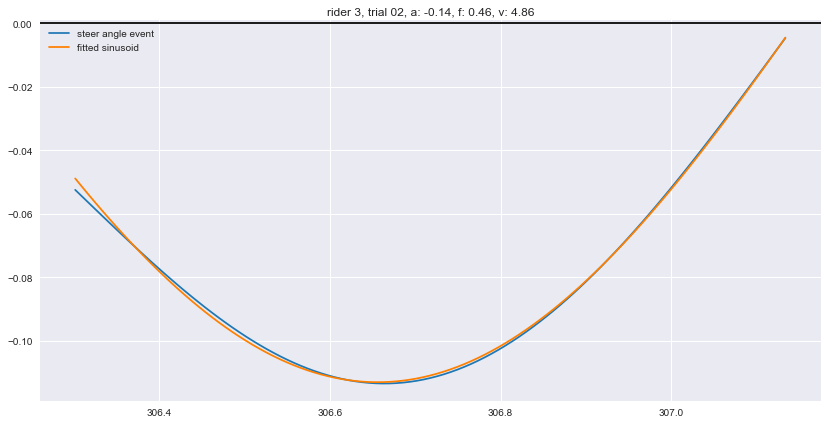

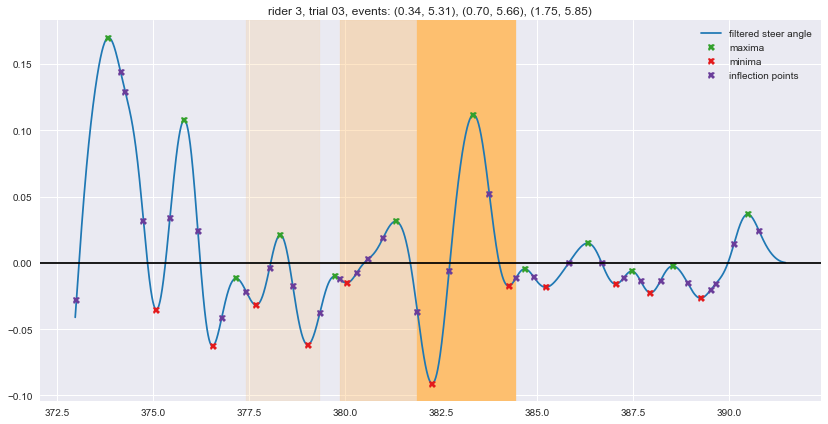

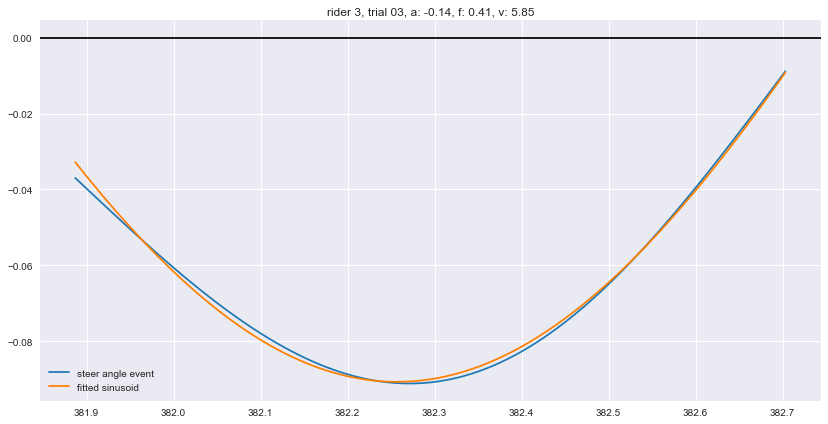

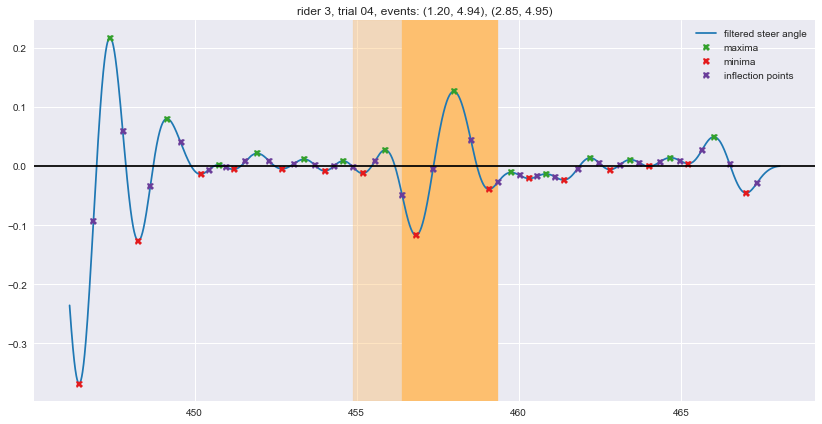

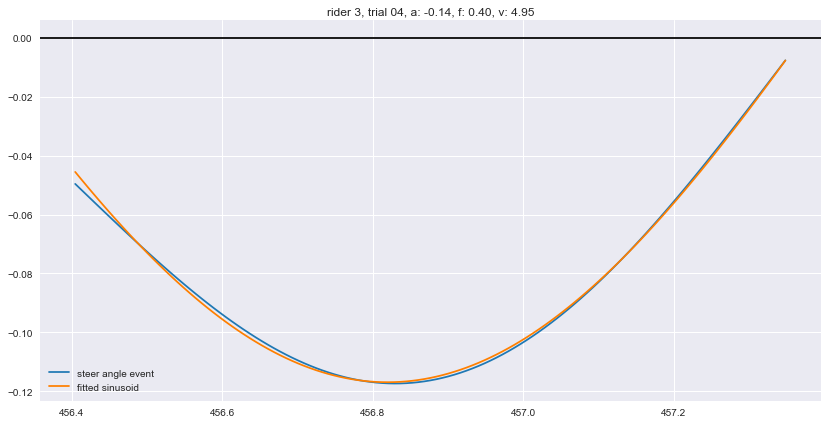

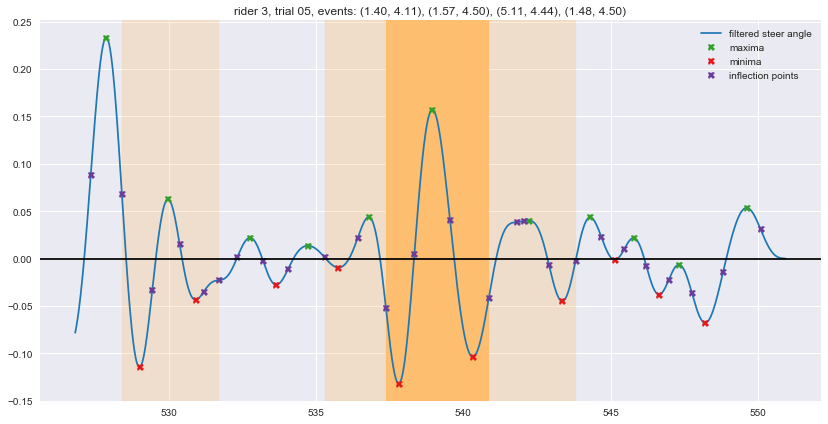

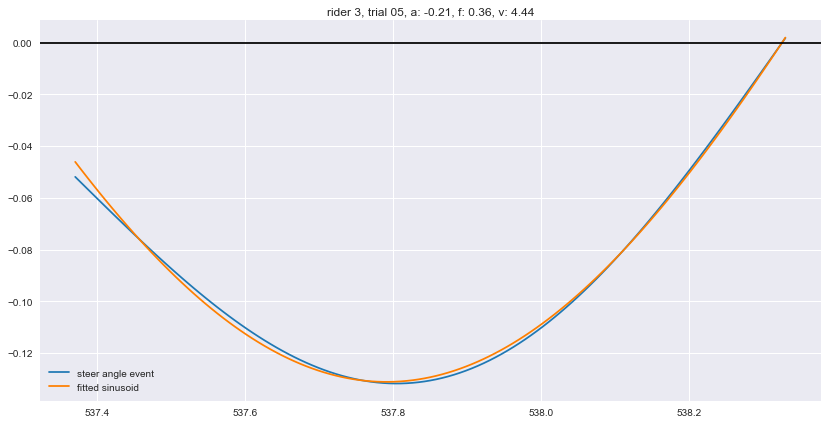

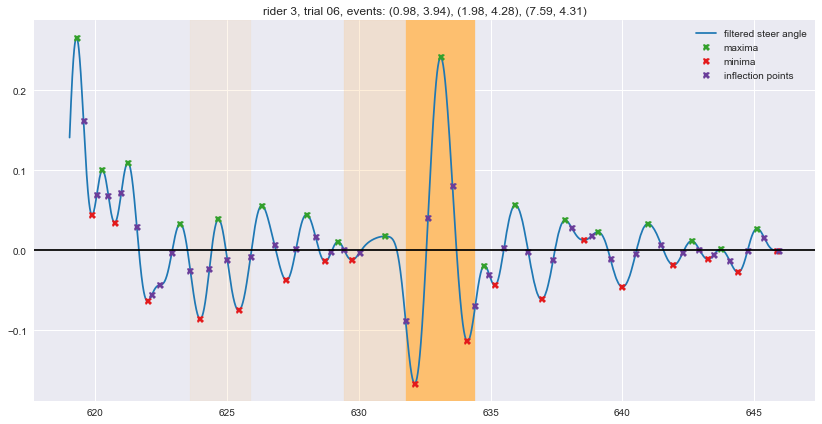

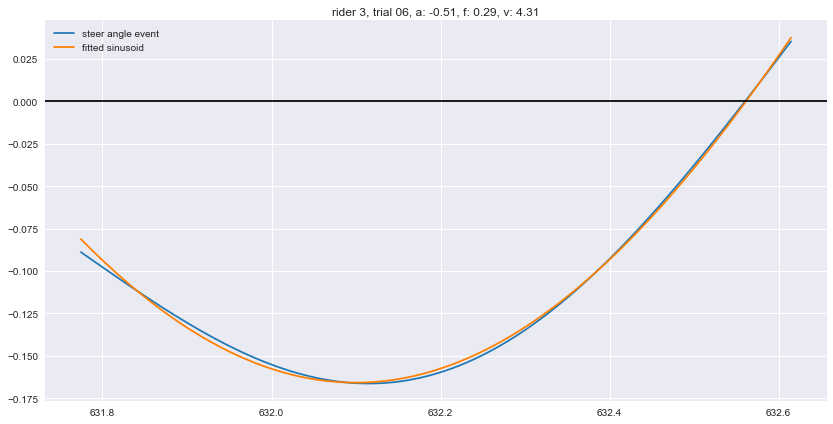

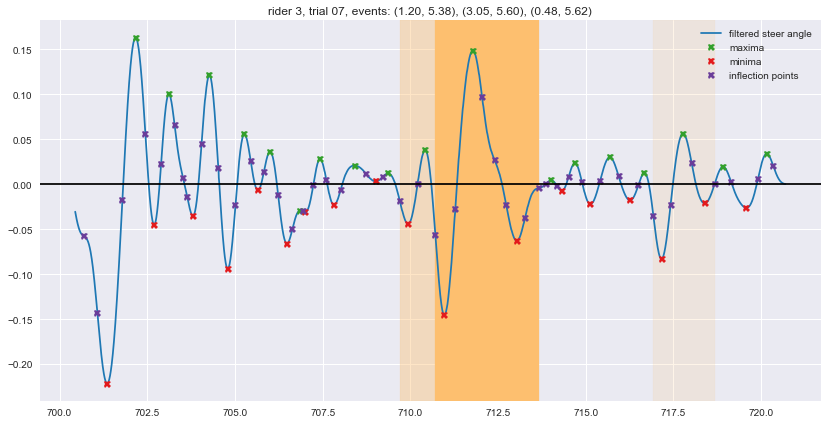

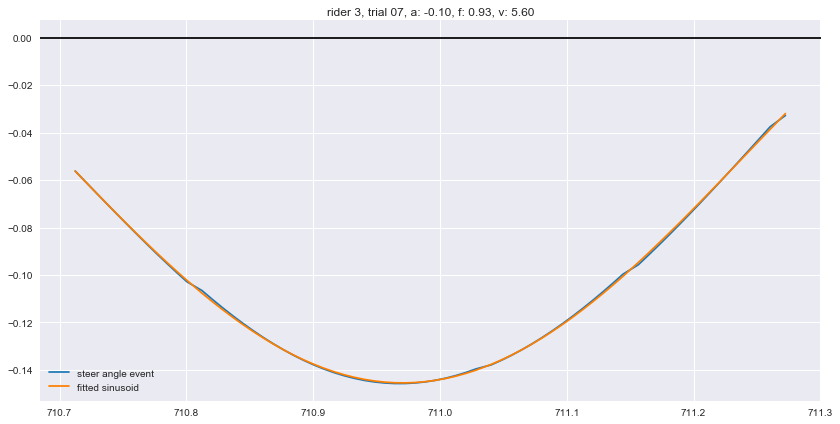

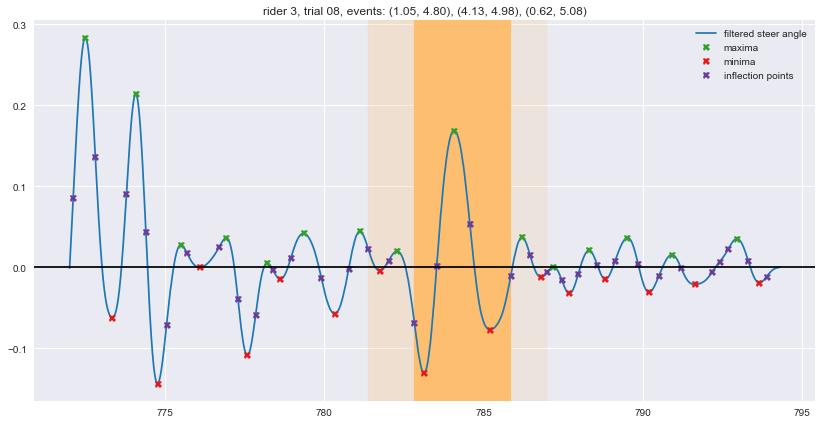

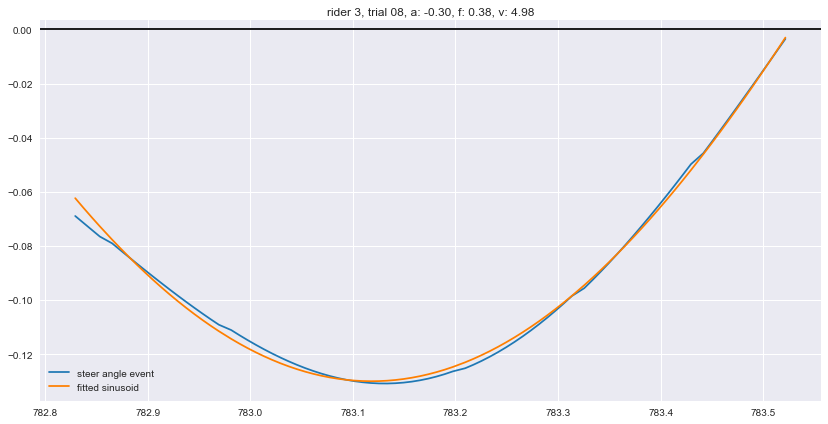

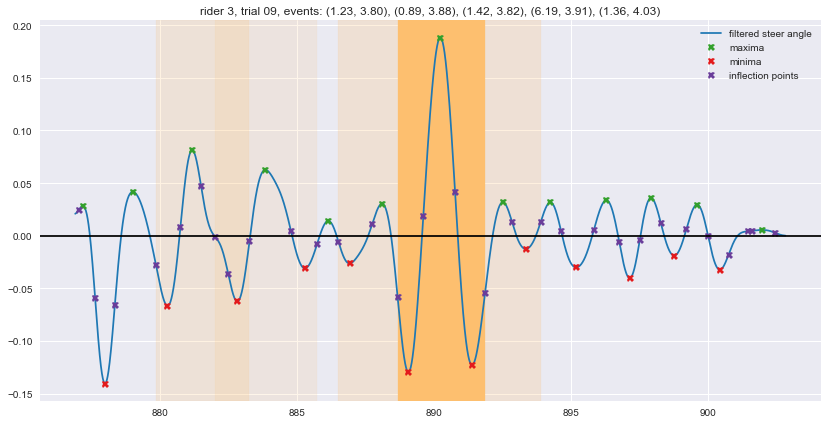

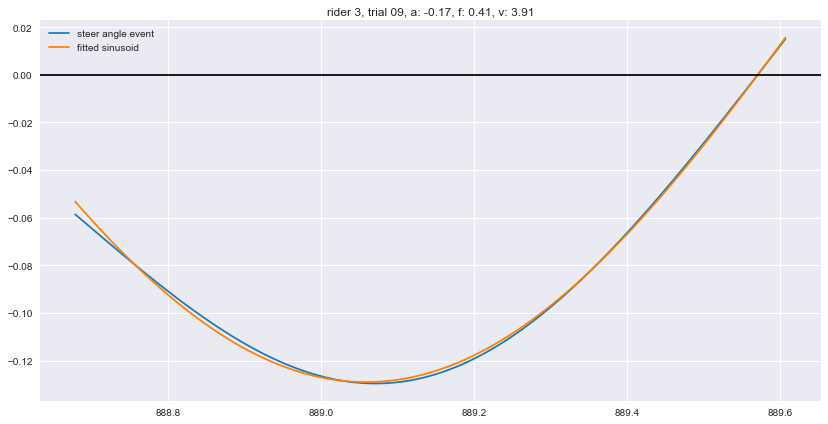

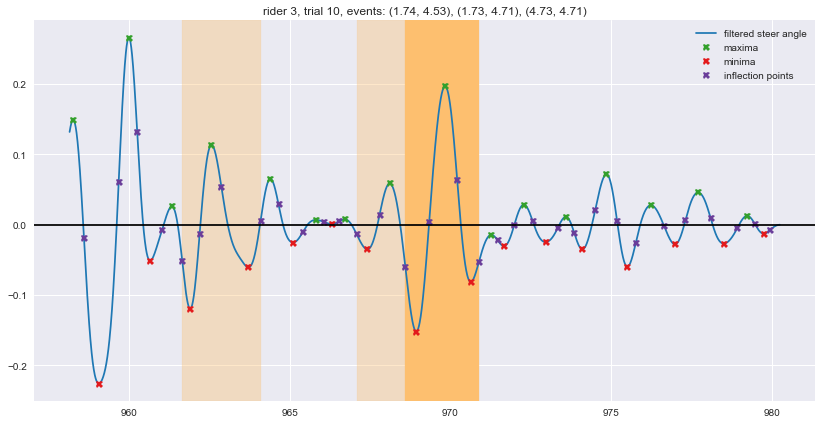

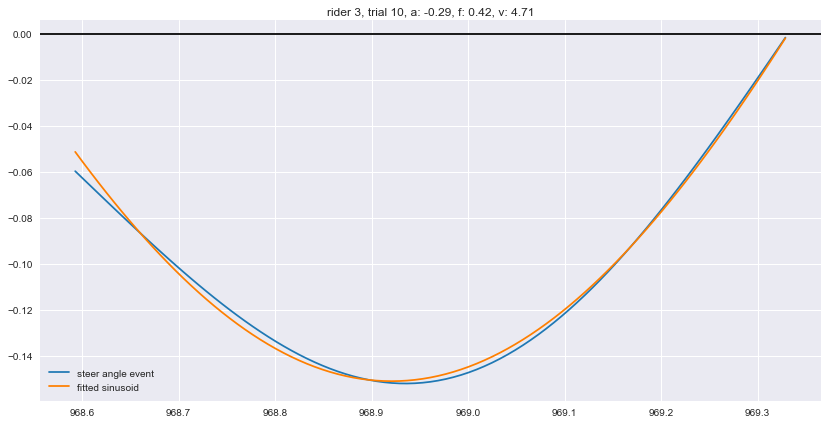

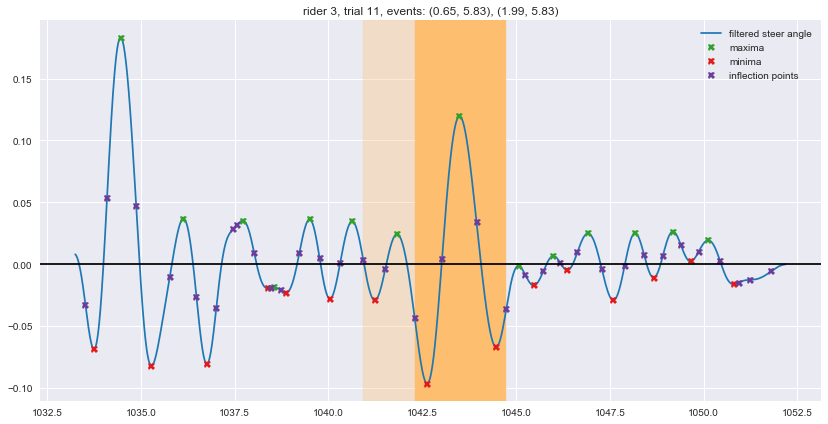

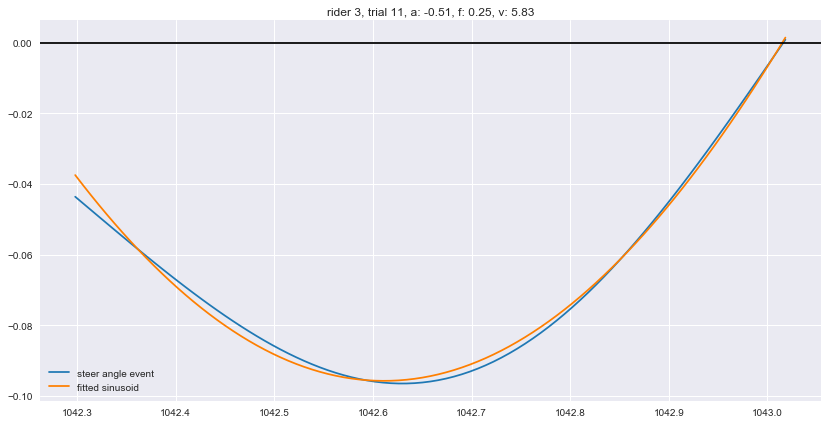

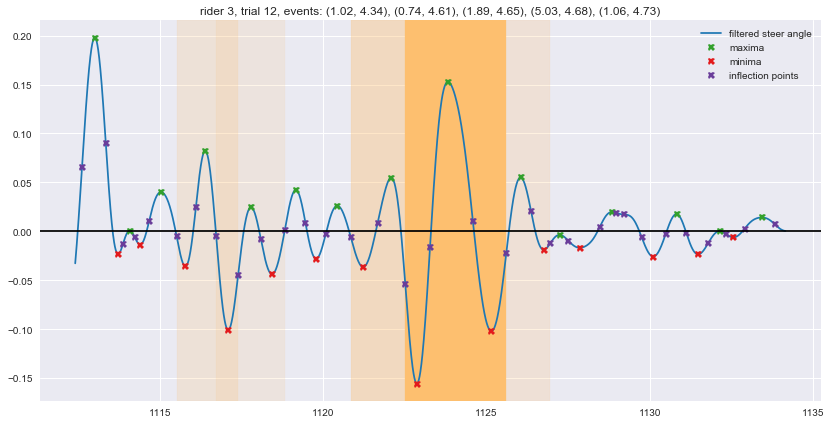

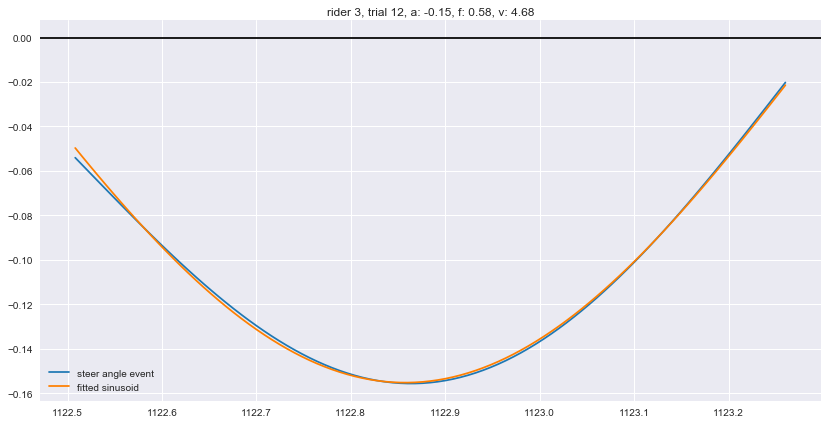

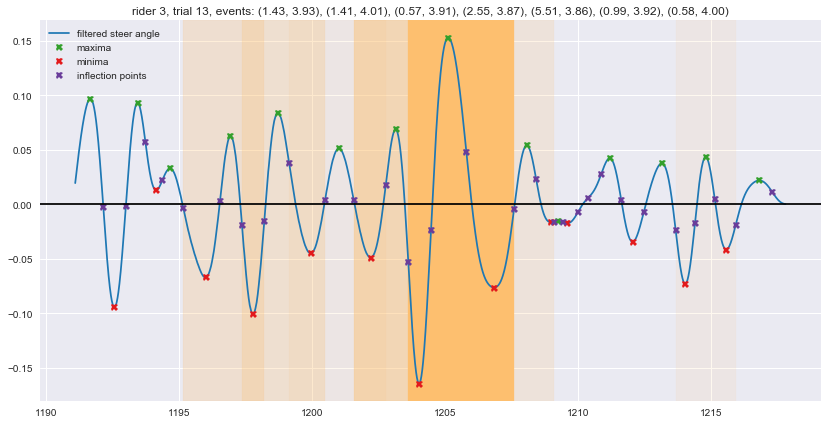

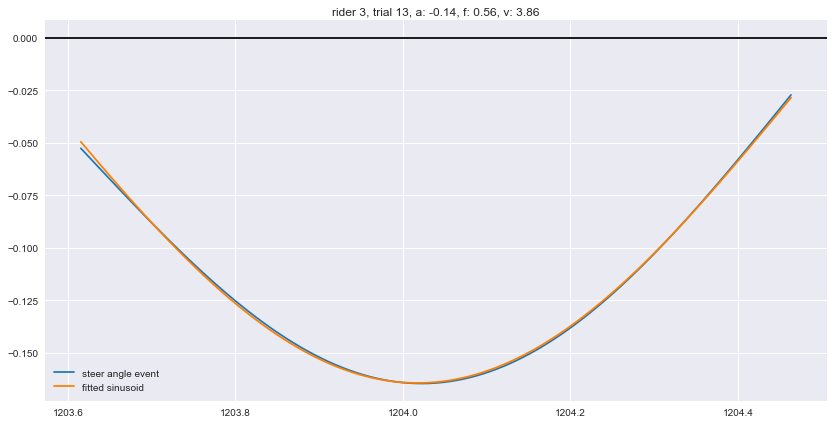

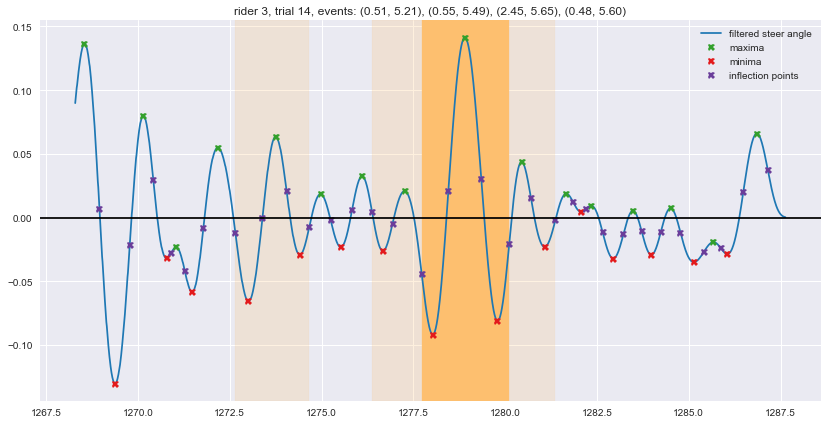

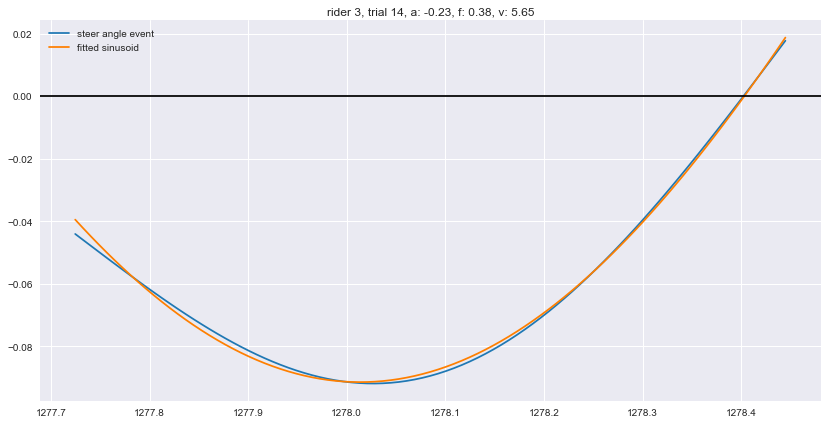

In [104]:
import numpy as np
import scipy
import seaborn as sns


# rider, speed, amplitude, freq
data = np.zeros((4*15, 5))

plt.close()
for rid, tid in itertools.product(range(4), range(15)):
    record = records[rid]
    trial = record.trial[tid]
    
    ax = trial.plot_steer_event_detection(figsize=DEFAULT_FIGSIZE)
    ax.set_title('rider {}, trial {:02d}, events: {}'.format(rid, tid, ax.get_title()))
    
    fig2, ax2 = plt.subplots(figsize=DEFAULT_FIGSIZE)
    t, y, ev = trial.steer_event_parameters()
    
    # best fit sinusoid 
    guess_ampl = np.abs(x).max()
    guess_freq = 1/(2*(t[-1] - t[0]))
    guess_phase = -t[0]
    guess_mean = 0
    
    optimize_f = lambda x: x[0]*np.sin(2*np.pi*x[1]*(t + x[2])) + x[3] - y
    
    est = scipy.optimize.leastsq(
        optimize_f,
        [guess_ampl, guess_freq, guess_phase, guess_mean])[0]
    est_y = optimize_f(est) + y
    
    colors = sns.color_palette('Paired', 10)
    ax2.plot(t, y, label='steer angle event', color=colors[1])
    ax2.plot(t, est_y, label='fitted sinusoid', color=colors[7])
    
    fit_desc = 'rider {}, trial {:02d}, a: {:0.02f}, f: {:0.02f}, v: {:0.02f}'.format(
        rid, tid, est[0], est[1], ev.speed)
    
    data[rid*15 + tid, :] = np.array([rid, tid, ev.speed, -est[0], 1/est[1]])
    
    ax2.legend()
    ax2.set_title(fit_desc)
    ax2.axhline(0, color='black')
plt.show()

In [98]:
import pandas as pd
df = pd.DataFrame(data=data, columns=['rider', 'trial', 'v', 'a', 't'])
print(df[2:])

    rider  trial         v         a          t
2     0.0    2.0  6.022226  0.024990   2.079125
3     0.0    3.0  4.016655  0.534901   3.492863
4     0.0    4.0  5.368322  0.038307   1.523387
5     0.0    5.0  5.994924  2.016889  11.332567
6     0.0    6.0  4.567633  2.303440  10.706264
7     0.0    7.0  5.189857  1.551989   9.156220
8     0.0    8.0  6.206539  0.897378  13.411717
9     0.0    9.0  4.198477  0.215408   6.194425
10    0.0   10.0  5.559790  3.445011  15.925844
11    0.0   11.0  6.314231  0.087470   1.824189
12    0.0   12.0  4.550632  0.222515   2.574741
13    0.0   13.0  5.537313  3.762748  19.220574
14    0.0   14.0  6.351615  3.691317  36.861291
15    1.0    0.0  4.986281  0.041481   2.421579
16    1.0    1.0  6.477340  0.026489   1.647223
17    1.0    2.0  5.304934  0.166526   3.321515
18    1.0    3.0  4.390369  0.091368   3.360114
19    1.0    4.0  6.106657  6.133230  55.607181
20    1.0    5.0  5.739989  0.102116   3.327778
21    1.0    6.0  4.175392  0.095814   2

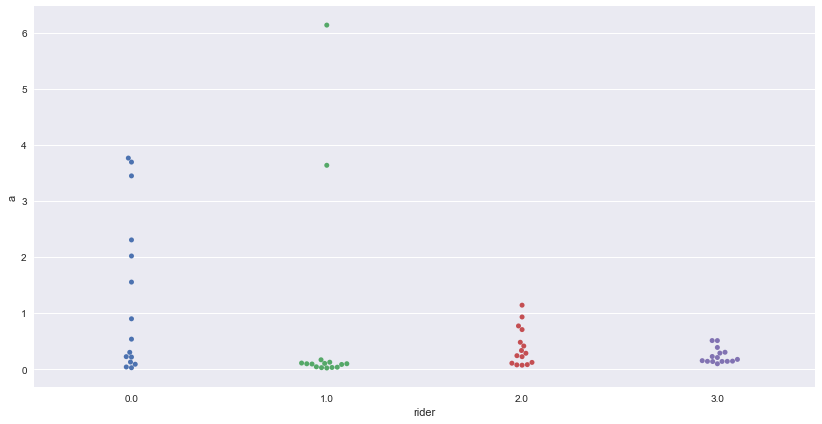

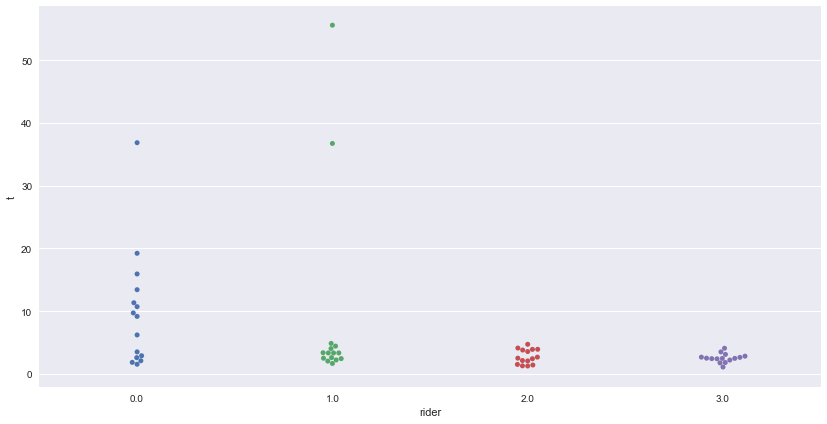

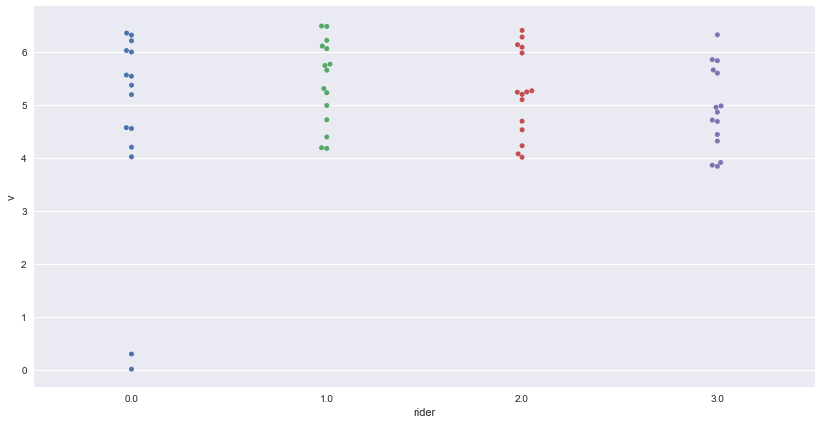

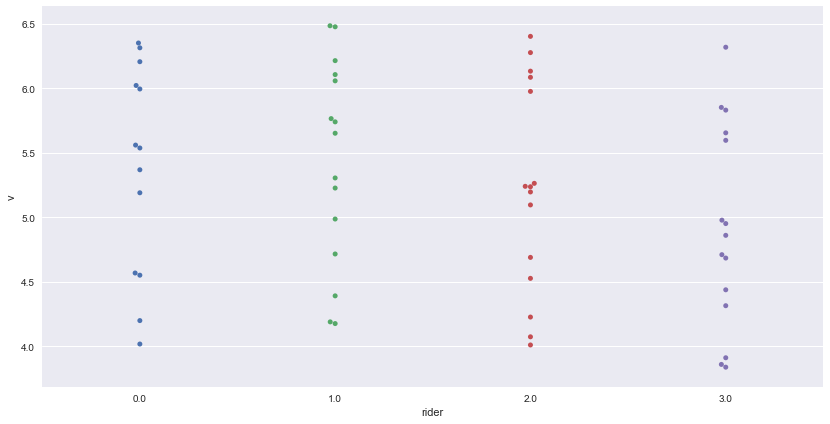

In [101]:
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='a', data=df, ax=ax)
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='t', data=df, ax=ax)
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='v', data=df, ax=ax)
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='v', data=df[2:], ax=ax)
plt.show()

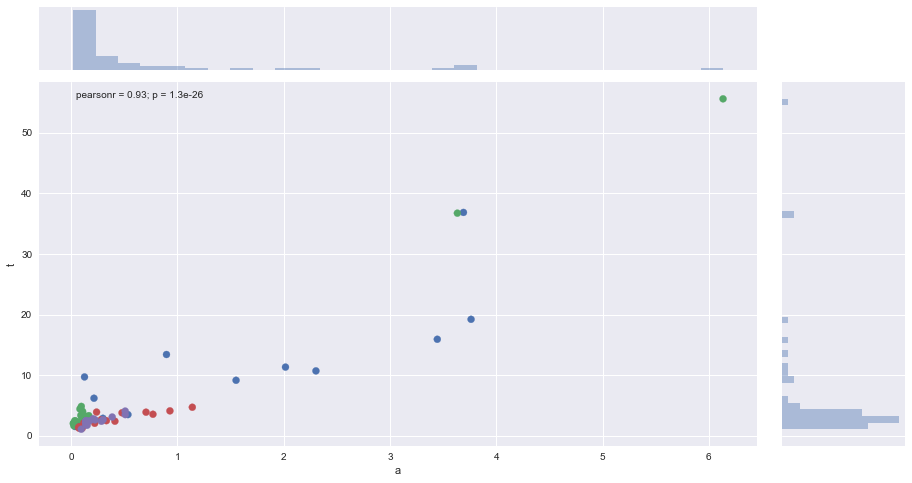

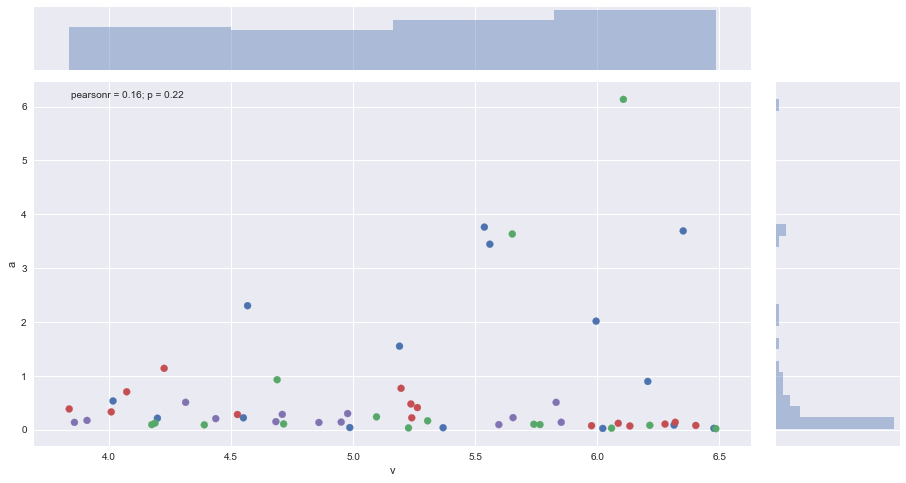

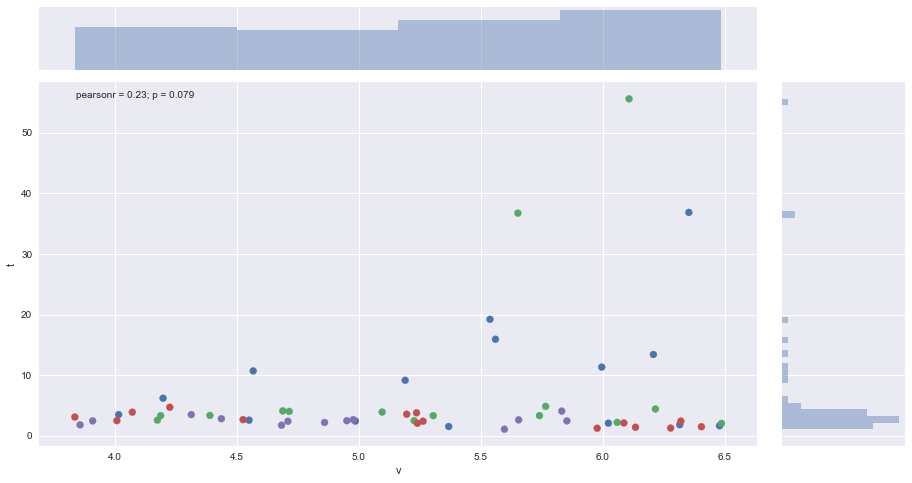

In [103]:
colors = sns.color_palette()
x = np.vectorize(lambda x: colors[int(x)])(df.as_matrix(['rider']))
y = np.array(x).transpose().reshape((-1, 3))

plt.close()
g = sns.jointplot(x='a', y='t', data=df, kind='scatter', joint_kws={'color': y})
g.fig.set_size_inches(DEFAULT_FIGSIZE)

g = sns.jointplot(x='v', y='a', data=df[2:], kind='scatter', joint_kws={'color': y})
g.fig.set_size_inches(DEFAULT_FIGSIZE)

g = sns.jointplot(x='v', y='t', data=df[2:], kind='scatter', joint_kws={'color': y})
g.fig.set_size_inches(DEFAULT_FIGSIZE)
plt.show()